In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox, shapiro

In [105]:
df = pd.read_csv("database/casks_database__casks_valuation_2.csv")
df

auction_date               distillery     region   country  strength  \
0     2025-01-06            Bruichladdich      Islay  Scotland     50.40   
1     2025-01-06             Copper House    England   England     64.80   
2     2025-01-06             Copper House    England   England     64.29   
3     2024-12-02             Copper House    England   England     64.29   
4     2024-12-02            Bruichladdich      Islay  Scotland     53.10   
..           ...                      ...        ...       ...       ...   
557   2024-09-08   Undisclosed Distillery   Lowlands  Scotland     62.30   
558   2024-09-08   Undisclosed Distillery   Lowlands  Scotland     62.60   
559   2024-09-08   Undisclosed Distillery   Lowlands  Scotland     63.10   
560   2024-09-08   Undisclosed Distillery   Lowlands  Scotland     62.60   
561   2024-10-27  Whitlaw (Highland Park)  Highlands  Scotland     64.50   

        rla  bulk_litres distillery_status cask_type cask_filling  ...    age  \
0     74.90       148.61       Operational    Barrel   First Fill  ...  20.00   
1     74.78       115.40       Operational    Barrel          NaN  ...  13.00   
2    111.59       173.58       Operational       NaN          NaN  ...   9.00   
3    111.59       173.58       Operational       NaN          NaN  ...   9.00   
4    115.30       217.14       Operational  Hogshead          NaN  ...    NaN   
..      ...          ...               ...       ...          ...  ...    ...   
557  136.13       218.50               NaN  Hogshead          NaN  ...   3.69   
558  140.91       225.10               NaN  Hogshead          NaN  ...   3.69   
559  147.53       233.80               NaN  Hogshead          NaN  ...   3.69   
560  139.79       223.30               NaN  Hogshead          NaN  ...   3.69   
561  135.45       210.00               NaN  Hogshead          NaN  ...   5.82   

     bottles_at_cask_strength  volume_12m  volume_6m  volume_3m  \
0                      212.30         105         63         26   
1                      164.86         105         63         26   
2                      247.97         105         63         26   
3                      247.97         132         70         45   
4                      310.20         132         70         45   
..                        ...         ...        ...        ...   
557                    312.14         100         45         25   
558                    321.57         100         45         25   
559                    334.00         100         45         25   
560                    319.00         100         45         25   
561                    300.00         124         67         37   

     inf_adj_hammer_price  inf_adj_hammer_price_per_bottle_at_cask_strength  \
0                19060.19                                             89.78   
1                 1030.28                                              6.25   
2                 1030.28                                              4.15   
3                  257.19                                              1.04   
4                22118.36                                             71.30   
..                    ...                                               ...   
557               3118.48                                              9.99   
558               3118.48                                              9.70   
559               3118.48                                              9.34   
560               3118.48                                              9.78   
561               5476.67                                             18.26   

     inf_adj_hammer_price_per_litre_of_alcohol  \
0                                       254.48   
1                                        13.78   
2                                         9.23   
3                                         2.30   
4                                       191.83   
..                                         ...   
557           

In [106]:
df.describe()

strength         rla  bulk_litres         age  \
count  556.000000  552.000000   554.000000  468.000000   
mean    59.970081  100.976322   172.475925   14.170705   
std      6.276445   49.128171    76.566902    8.487764   
min     32.800000   17.000000    29.410000    0.650000   
25%     56.975000   70.617500   132.512500    7.500000   
50%     60.900000   96.760000   164.100000   12.005000   
75%     63.600000  119.532500   196.000000   20.000000   
max     71.260000  317.660000   511.330000   38.000000   

       bottles_at_cask_strength  volume_12m   volume_6m   volume_3m  \
count                554.000000  562.000000  562.000000  562.000000   
mean                 246.394329   74.866548   40.325623   20.656584   
std                  109.381330   34.651949   21.637320   12.687294   
min                   42.010000    0.000000    0.000000    0.000000   
25%                  189.302500   41.000000   21.000000    9.000000   
50%                  234.430000   84.000000   42.000000   23.000000   
75%                  280.000000   99.000000   61.000000   28.000000   
max                  730.470000  134.000000   87.000000   46.000000   

       inf_adj_hammer_price  inf_adj_hammer_price_per_bottle_at_cask_strength  \
count          5.620000e+02                                        554.000000   
mean           1.893175e+04                                         82.969585   
std            5.562210e+04                                        188.503325   
min            2.571900e+02                                          1.040000   
25%            3.118480e+03                                         13.287500   
50%            5.749270e+03                                         27.805000   
75%            1.656492e+04                                         66.047500   
max            1.064269e+06                                       1991.930000   

       inf_adj_hammer_price_per_litre_of_alcohol  \
count                                 552.000000   
mean                                  248.525797   
std                                   623.285863   
min                                     2.300000   
25%                                    29.232500   
50%                                    66.740000   
75%                                   168.057500   
max                                  6105.910000   

       inf_adj_hammer_price_per_litre_of_alcohol_per_age  \
count                                         461.000000   
mean                                           14.156746   
std                                            22.629892   
min                                             0.260000   
25%                                             4.980000   
50%                                             7.750000   
75%                                            13.310000   
max                                           210.330000   

       inf_adj_hammer_price_per_age  
count                    468.000000  
mean                    1138.136624  
std                     1875.216278  
min                       28.580000  
25%                      418.450000  
50%                      712.550000  
75%                     1201.225000  
max                    31019.200000

# Exploring numerical X variables

In [107]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if 'hammer_price' not in col]
numerical_columns

['strength',
 'rla',
 'bulk_litres',
 'age',
 'bottles_at_cask_strength',
 'volume_12m',
 'volume_6m',
 'volume_3m']

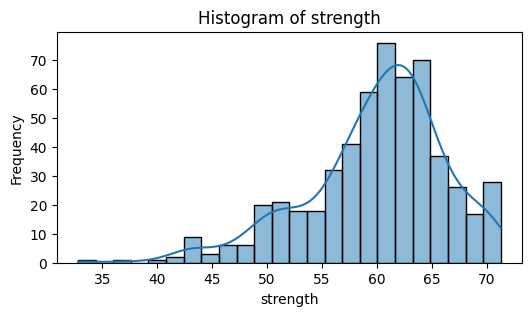

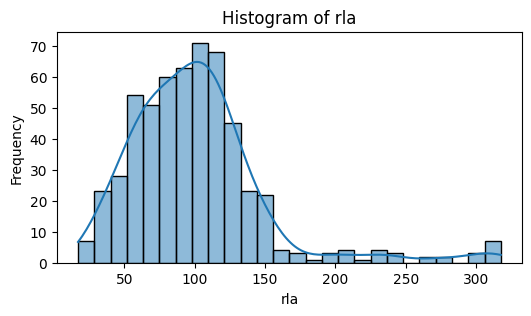

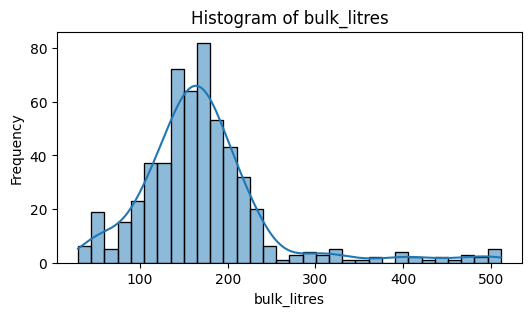

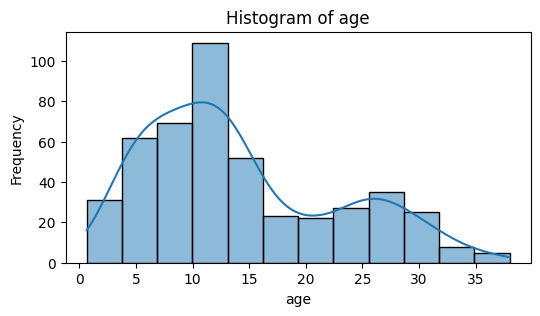

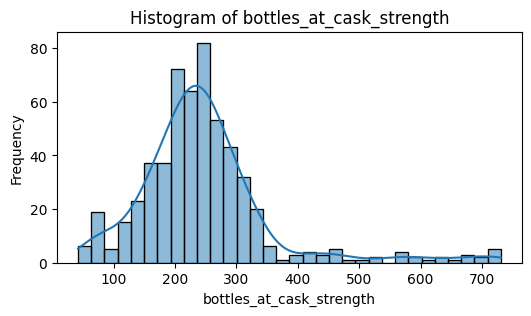

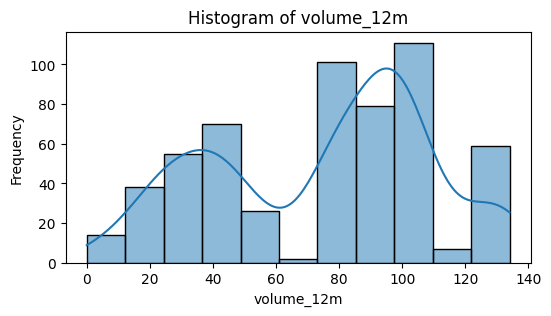

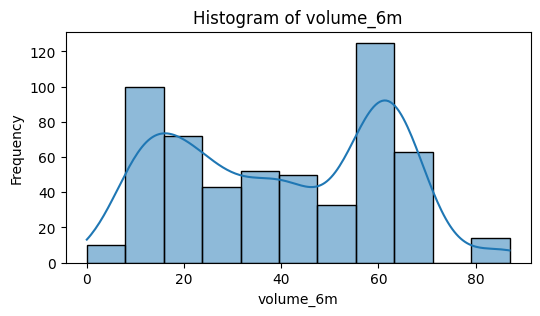

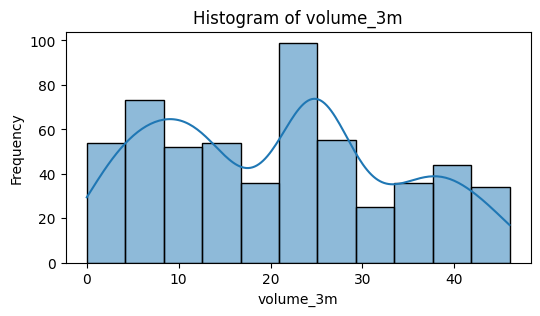

In [108]:
for column in numerical_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Exploring categorical X variables

In [109]:
categorical_columns = ['distillery', 'region', 'country', 'distillery_status', 'cask_type', 'cask_filling', 'previous_spirit']

In [110]:
df[categorical_columns] = df[categorical_columns].fillna('Undisclosed')

distillery
distillery
Bruichladdich                 64
Adnams                        60
Tullibardine                  48
Ben Nevis                     24
Macallan                      21
                              ..
Littlemill                     1
Hinch                          1
Highland Park                  1
Lochindaal (Bruichladdich)     1
Whitlaw (Highland Park)        1
Name: count, Length: 91, dtype: int64


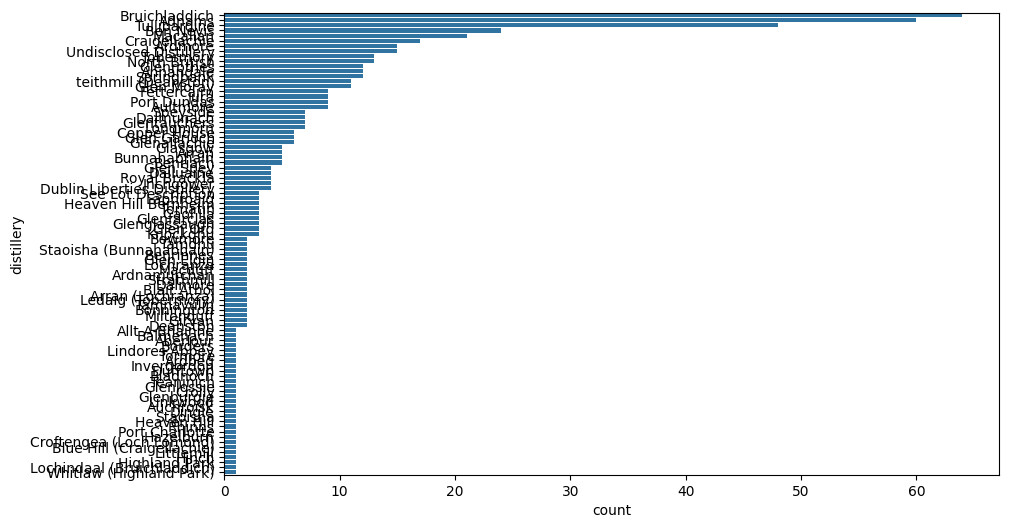

C:\Users\joaov\AppData\Local\Temp\ipykernel_1400\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


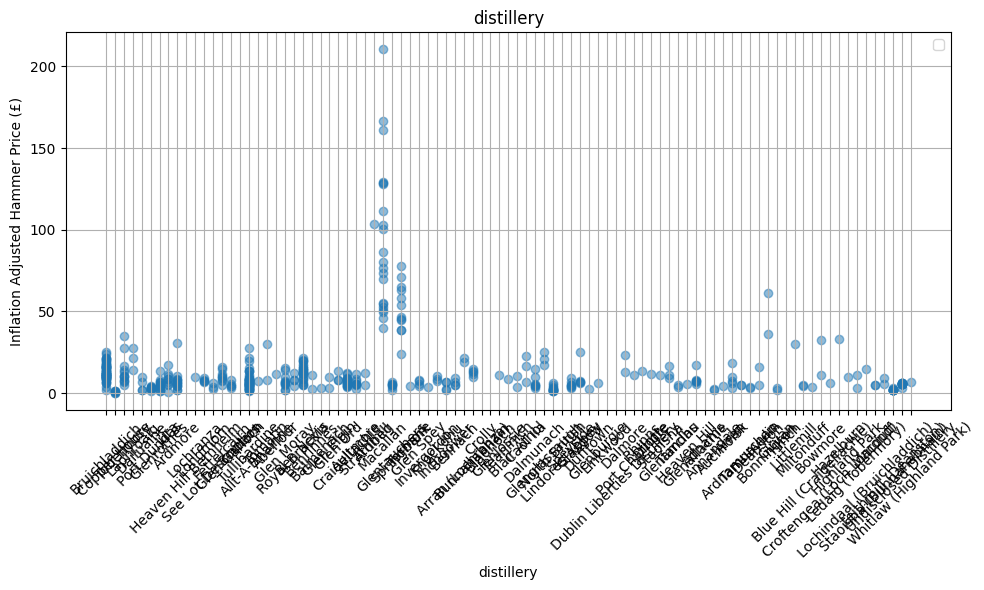



region
region
Speyside         155
Highlands        155
Islay             80
England           66
Lowlands          61
Islands           19
Campbeltown       13
Ireland            7
Kentucky, USA      3
Hogshead           1
Undisclosed        1
USA                1
Name: count, dtype: int64


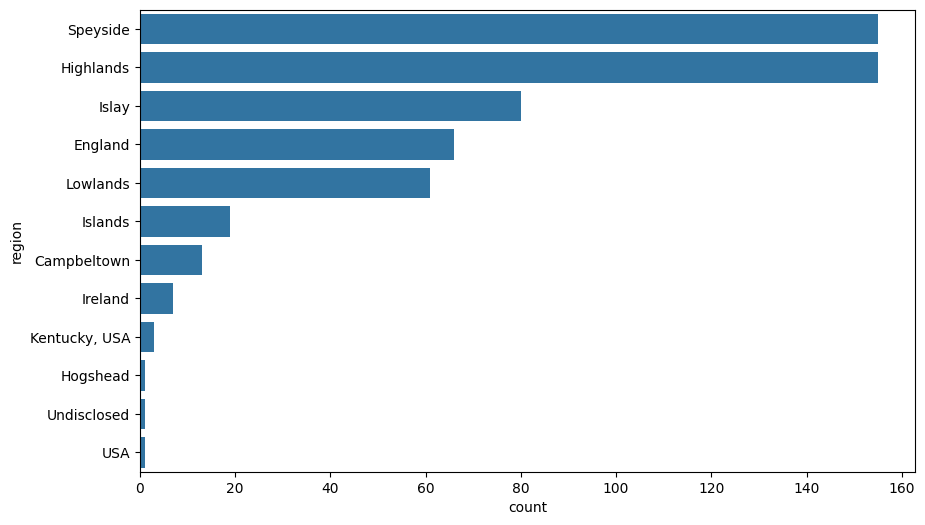

C:\Users\joaov\AppData\Local\Temp\ipykernel_1400\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


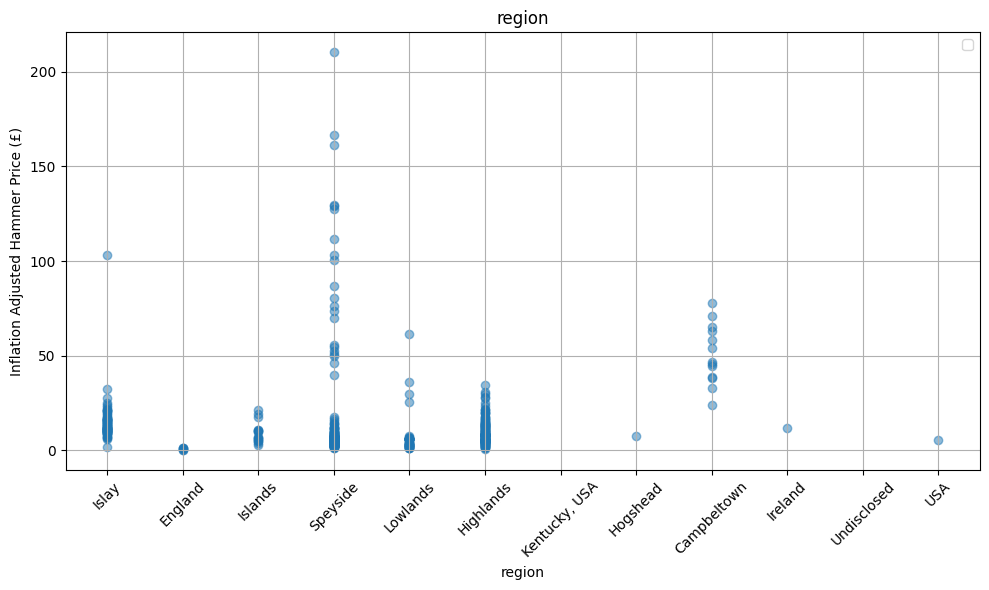



country
country
Scotland       482
England         66
Ireland          7
USA              4
Undisclosed      2
Hogshead         1
Name: count, dtype: int64


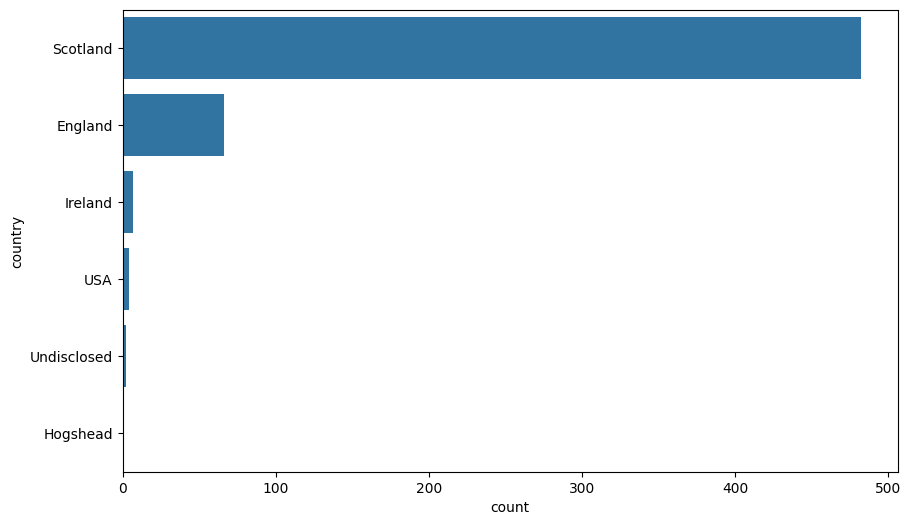

C:\Users\joaov\AppData\Local\Temp\ipykernel_1400\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


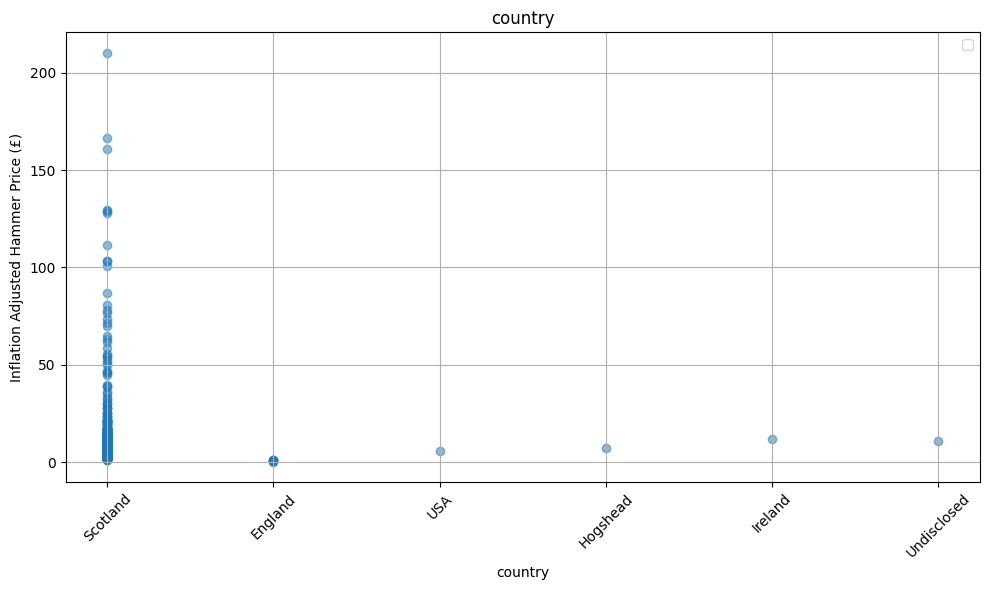



distillery_status
distillery_status
Operational    517
Undisclosed     35
Closed          10
Name: count, dtype: int64


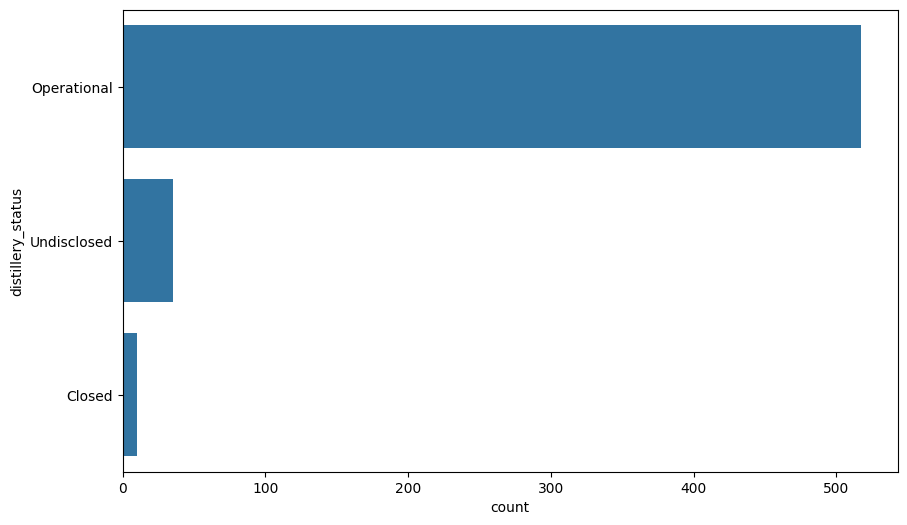

C:\Users\joaov\AppData\Local\Temp\ipykernel_1400\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


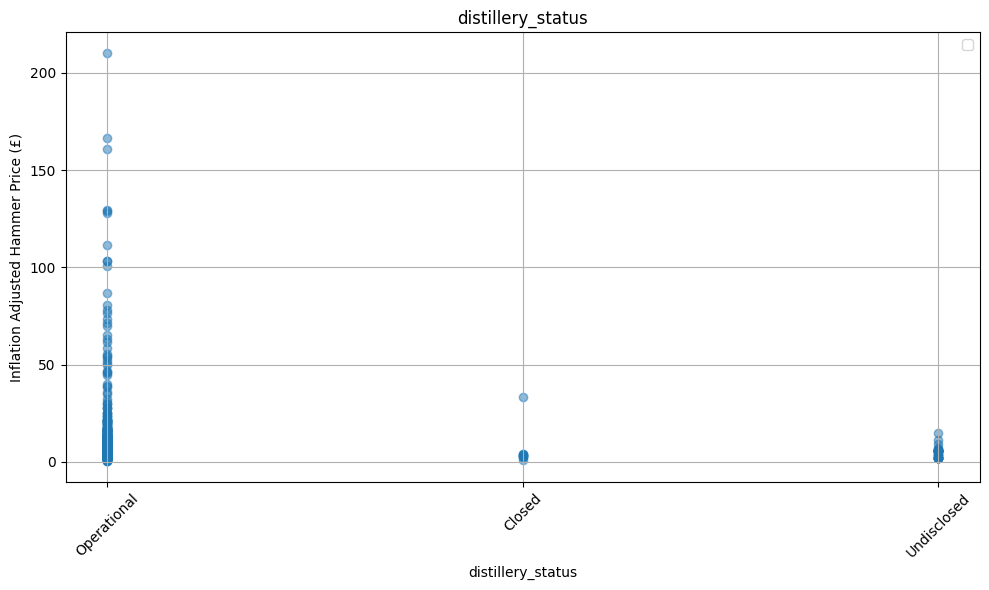



cask_type
cask_type
Barrel          194
Hogshead        190
Undisclosed      52
Barrique         43
Butt             29
Quarter Cask     28
Octave           26
Name: count, dtype: int64


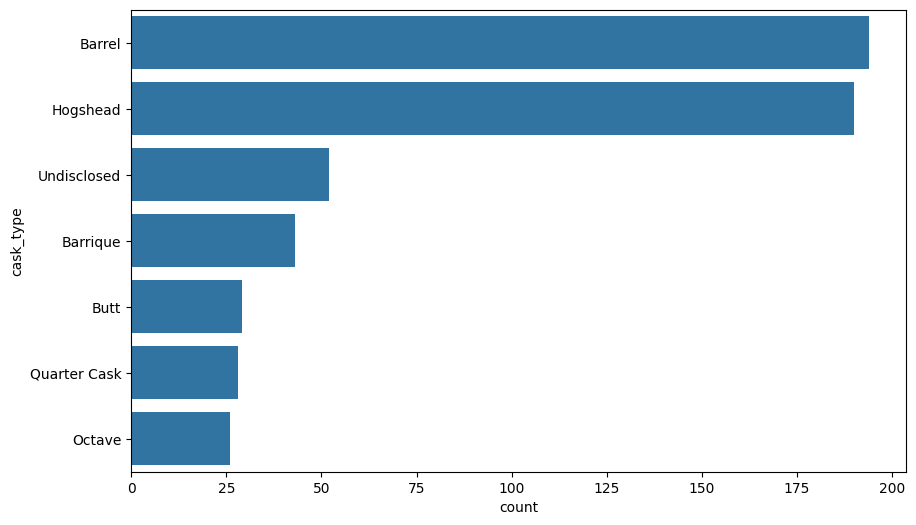

C:\Users\joaov\AppData\Local\Temp\ipykernel_1400\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


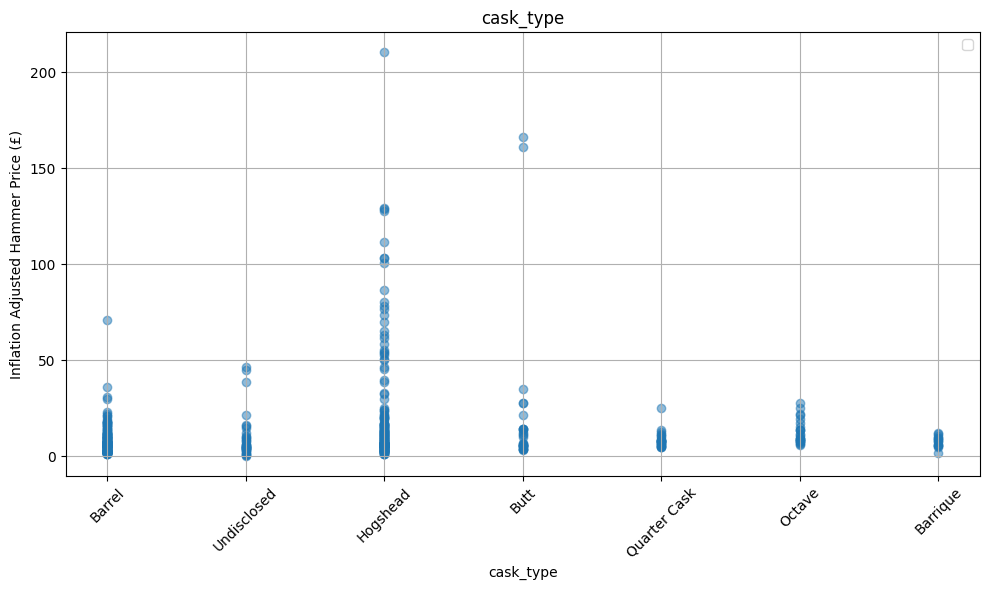



cask_filling
cask_filling
Undisclosed    311
First Fill     184
Second Fill     61
Virgin Oak       3
Third Fill       3
Name: count, dtype: int64


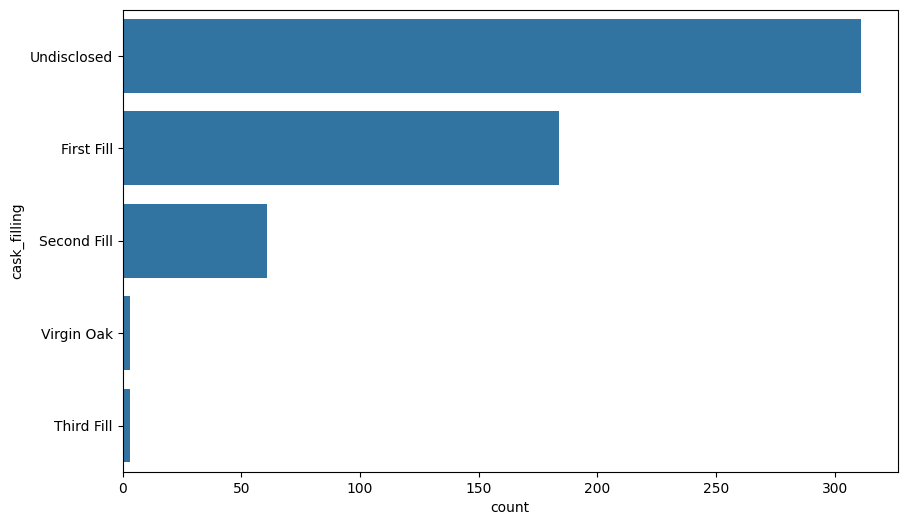

C:\Users\joaov\AppData\Local\Temp\ipykernel_1400\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


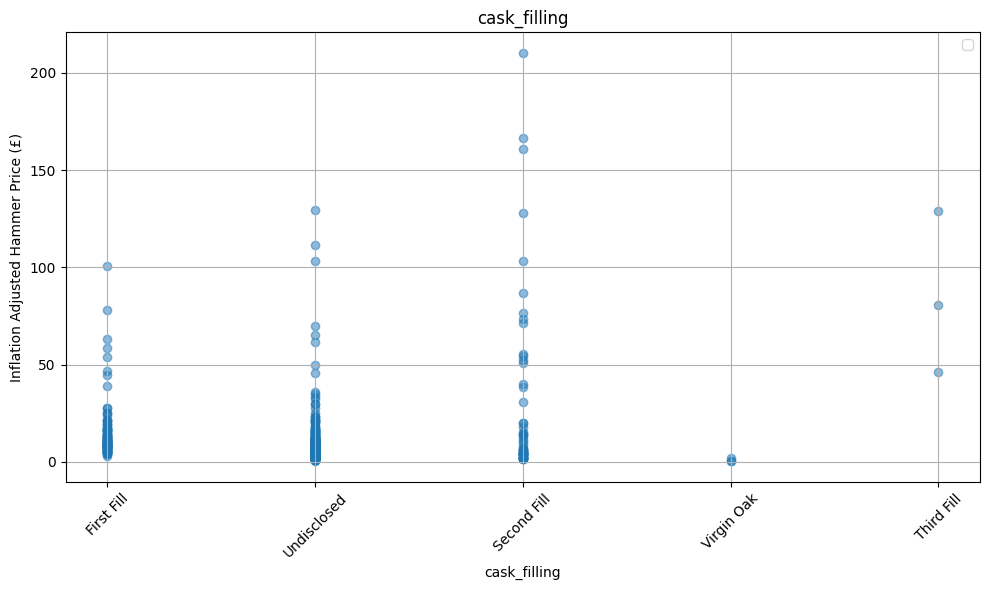



previous_spirit
previous_spirit
Undisclosed    264
Bourbon        159
Sherry          98
Wine            24
Port             7
Rum              4
Virgin Oak       4
Madeira          2
Name: count, dtype: int64


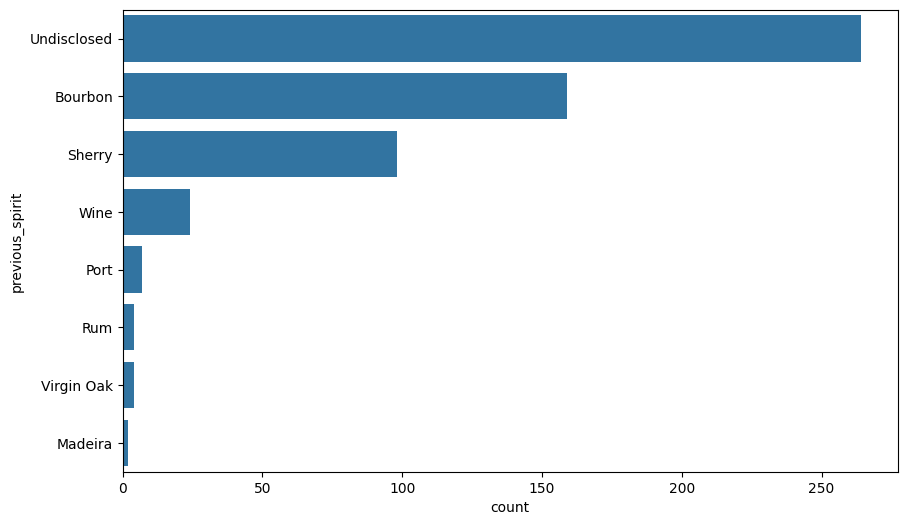

C:\Users\joaov\AppData\Local\Temp\ipykernel_1400\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


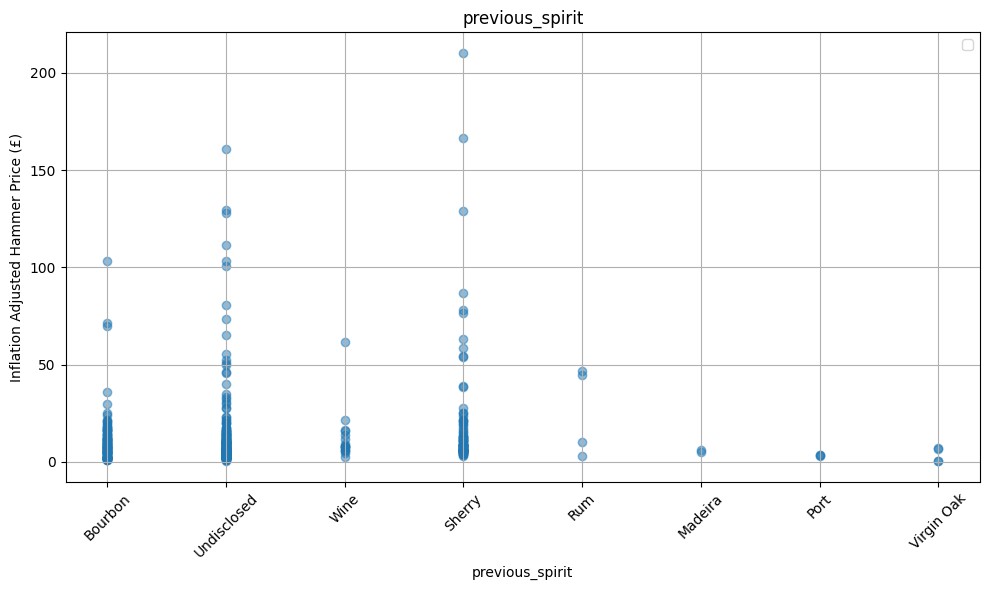

In [111]:
for column in categorical_columns:
    
    print(column)

    print(df[column].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(df[column], df['inf_adj_hammer_price_per_litre_of_alcohol_per_age'], alpha=0.5)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Inflation Adjusted Hammer Price (£)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

    print('\n')

In [112]:
pd.crosstab(df['cask_type'], df['previous_spirit'])

previous_spirit  Bourbon  Madeira  Port  Rum  Sherry  Undisclosed  Virgin Oak  \
cask_type                                                                       
Barrel               129        0     0    2       1           60           2   
Barrique               0        1     0    0       5           35           0   
Butt                   0        0     0    0      10           19           0   
Hogshead              17        0     3    0      45          115           0   
Octave                 2        0     0    0      17            1           0   
Quarter Cask           0        1     0    0      13           11           0   
Undisclosed           11        0     4    2       7           23           2   

previous_spirit  Wine  
cask_type              
Barrel              0  
Barrique            2  
Butt                0  
Hogshead           10  
Octave              6  
Quarter Cask        3  
Undisclosed         3

# Data cleaning

In [113]:
# Columns with too mutch NaN values
df.drop(columns=['cask_filling', 'distillery_status'], inplace=True)

In [114]:
# Unused Y variable
df.drop(columns=['inf_adj_hammer_price_per_bottle_at_cask_strength'], inplace=True)

In [115]:
df = df[df['strength'] >= 40]  # Remove casks with strength less than 40% ABV

In [116]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

C:\Users\joaov\AppData\Local\Temp\ipykernel_1400\3973663077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


auction_date                                         0
distillery                                           0
region                                               0
country                                              0
strength                                             0
rla                                                  0
bulk_litres                                          0
cask_type                                            0
previous_spirit                                      0
age                                                  0
bottles_at_cask_strength                             0
volume_12m                                           0
volume_6m                                            0
volume_3m                                            0
inf_adj_hammer_price                                 0
inf_adj_hammer_price_per_litre_of_alcohol            0
inf_adj_hammer_price_per_litre_of_alcohol_per_age    0
inf_adj_hammer_price_per_age                         0
dtype: int

In [117]:
def remove_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].reset_index(drop=True)

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].hist(df[column], color='blue', alpha=0.5)
    axs[0].set_title(column)

    axs[1].hist(filtered_df[column], color='blue', alpha=0.5)
    axs[1].set_title(f'{column} - No Outliers')

    plt.show()

    return filtered_df

inf_adj_hammer_price


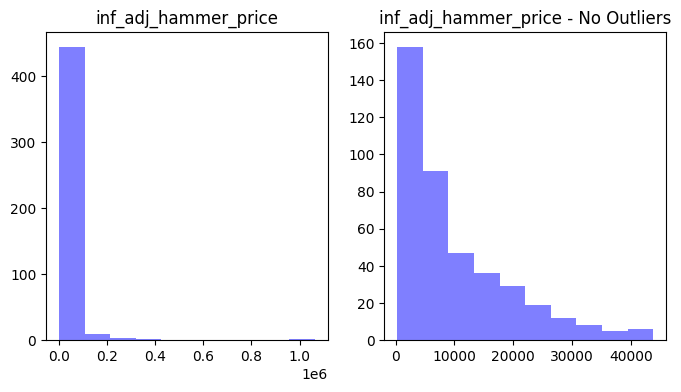

P-value - Shapiro-Wilk: 0.0000


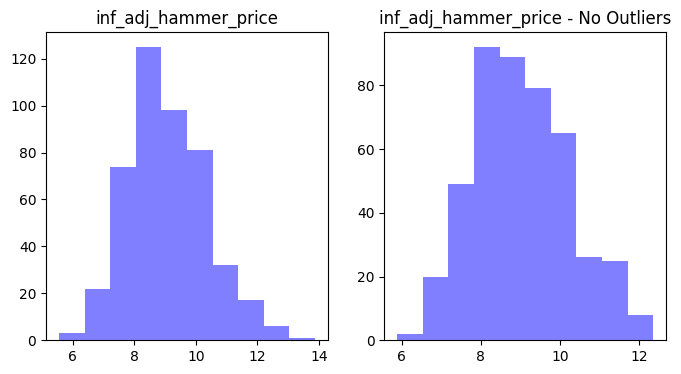

P-value - Shapiro-Wilk: 0.0000


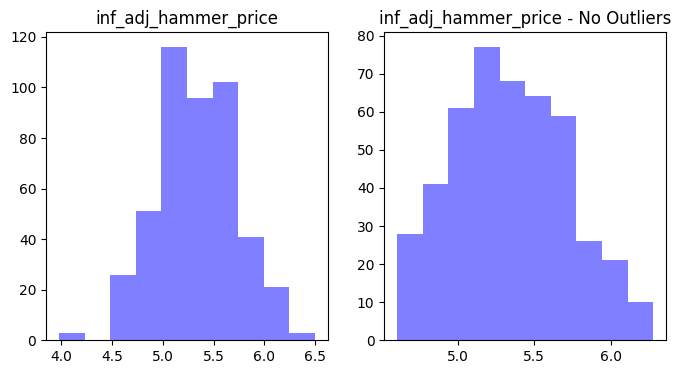

P-value - Shapiro-Wilk: 0.0011


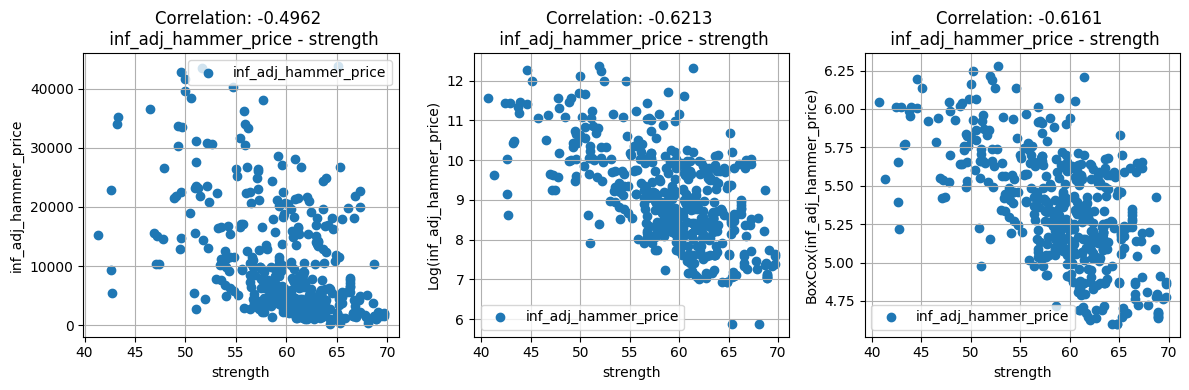

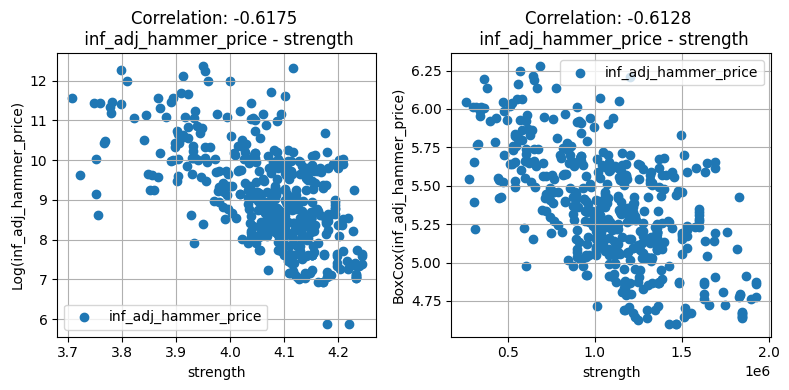

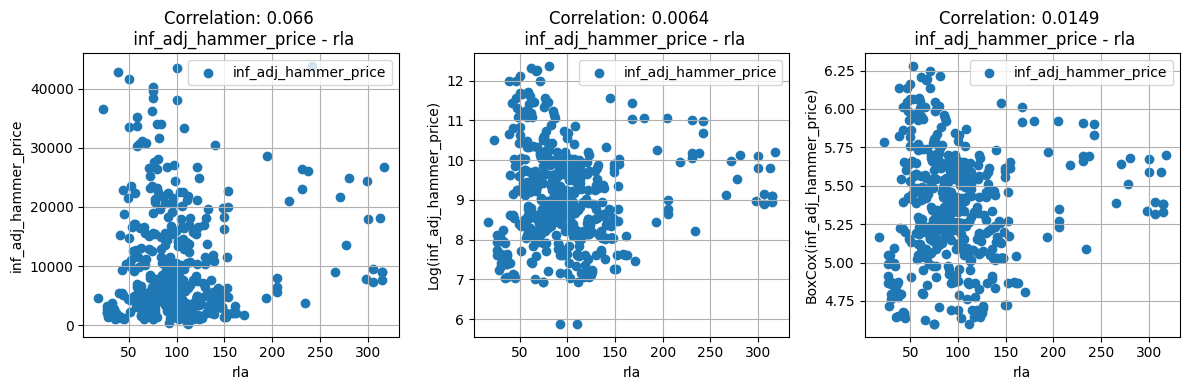

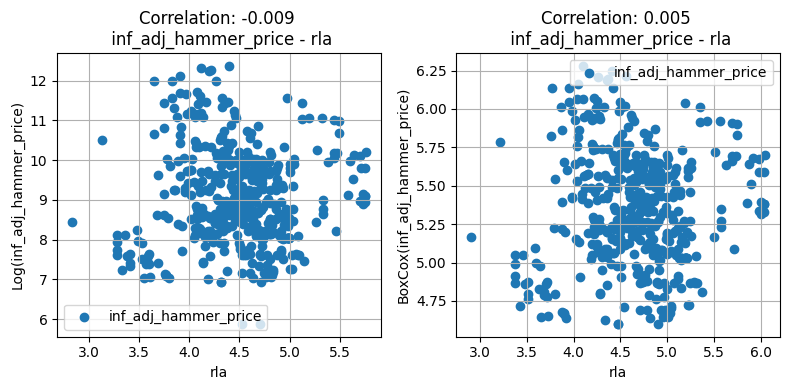

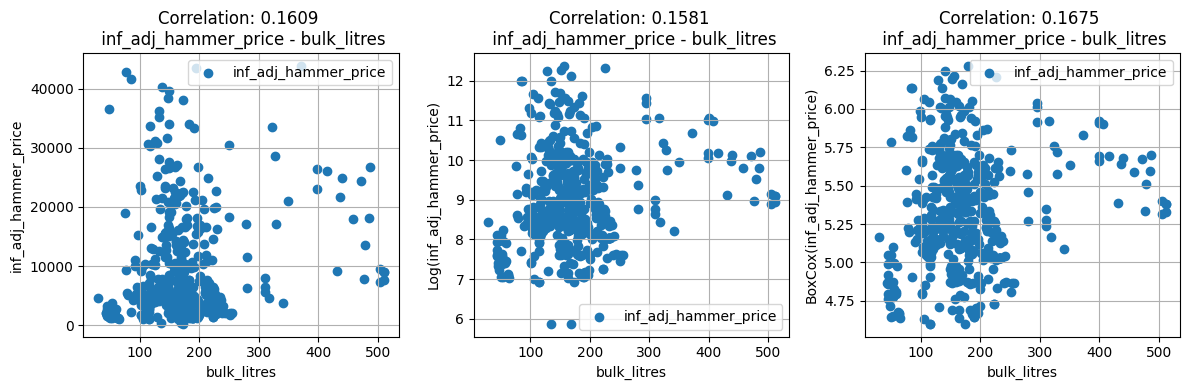

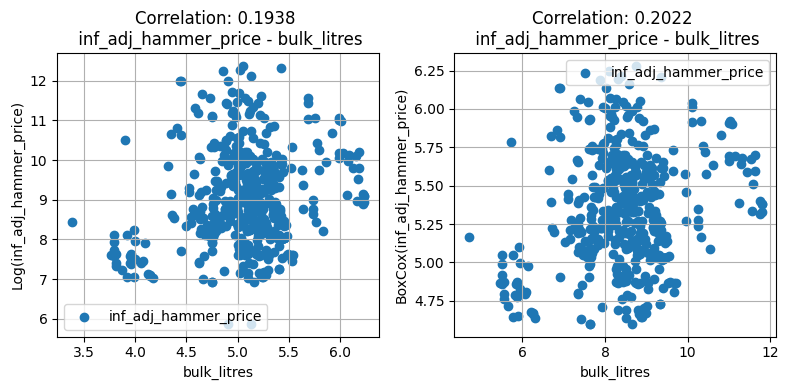

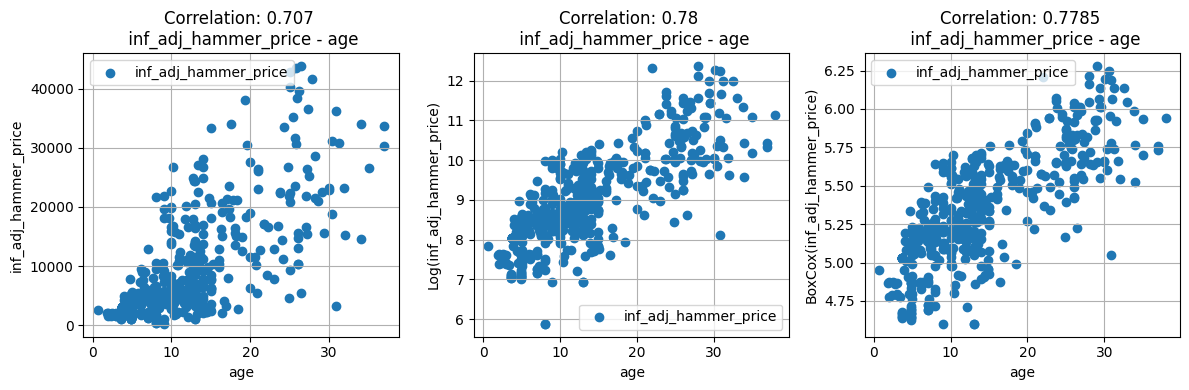

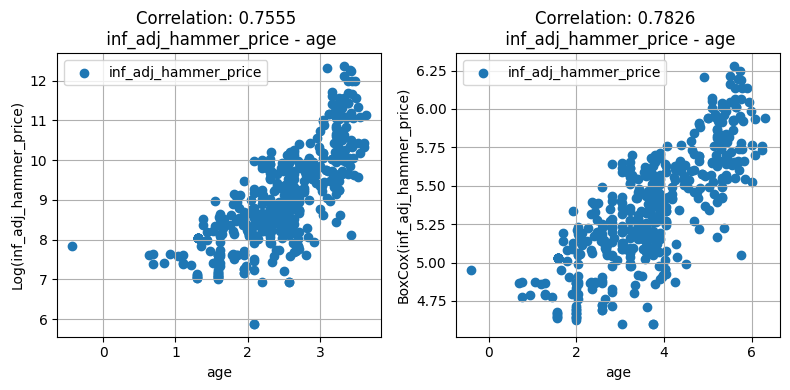

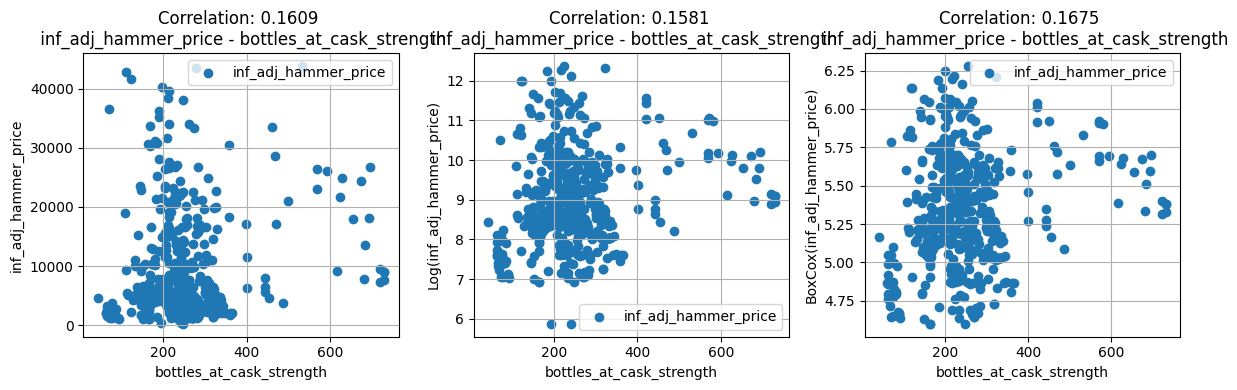

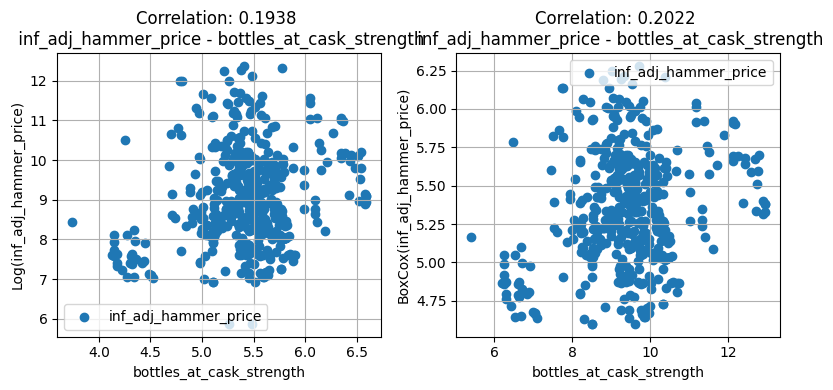

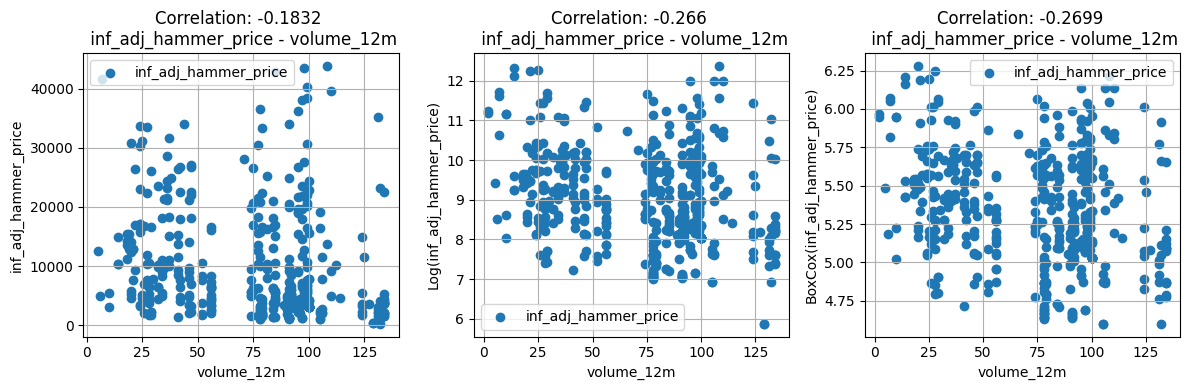

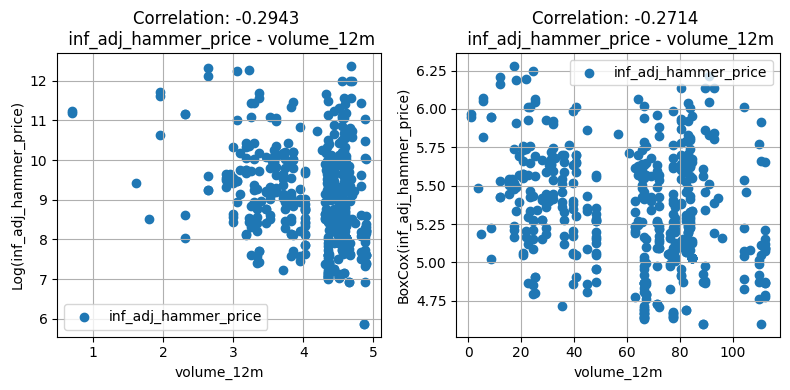

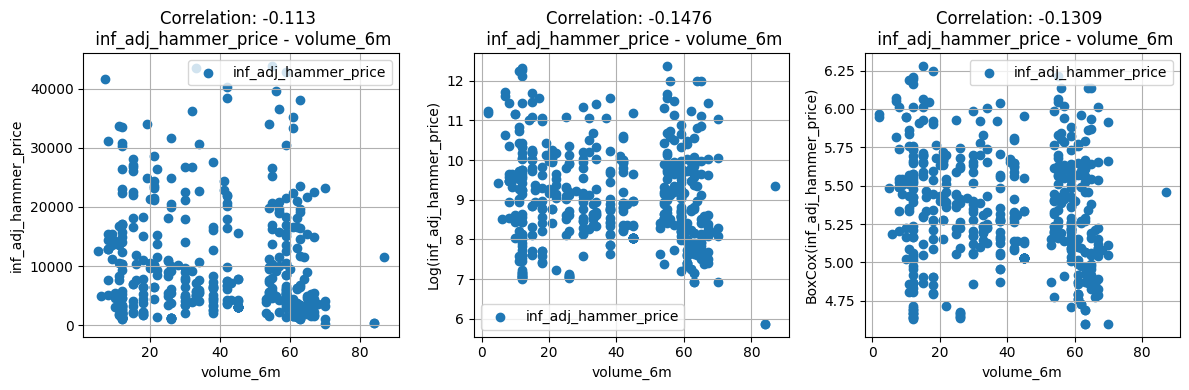

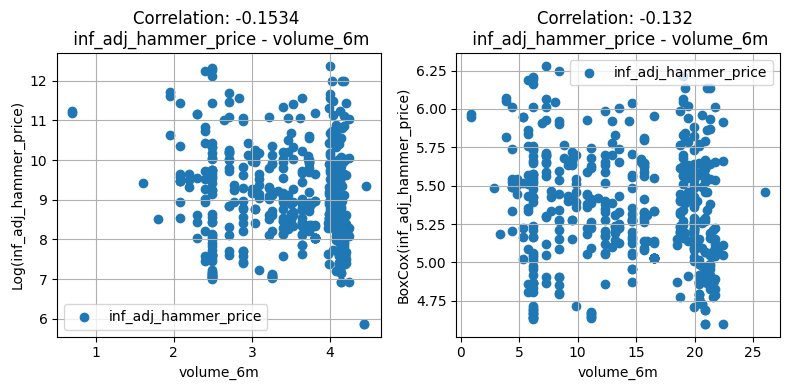

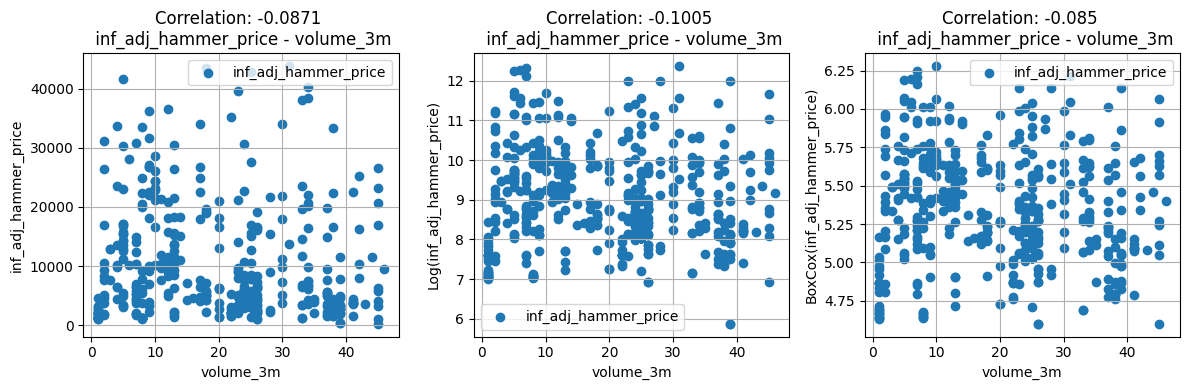

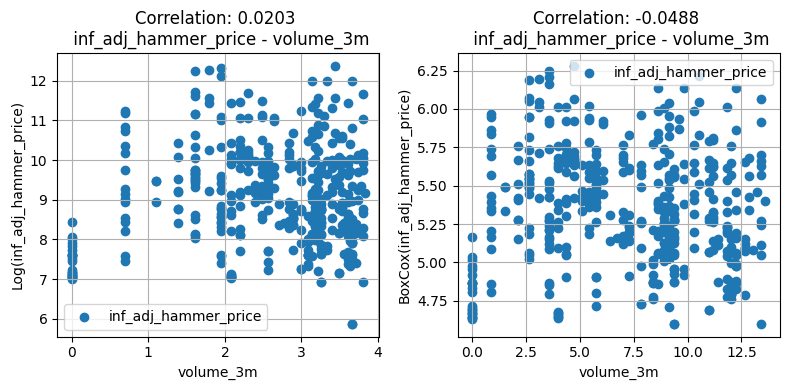



inf_adj_hammer_price_per_litre_of_alcohol


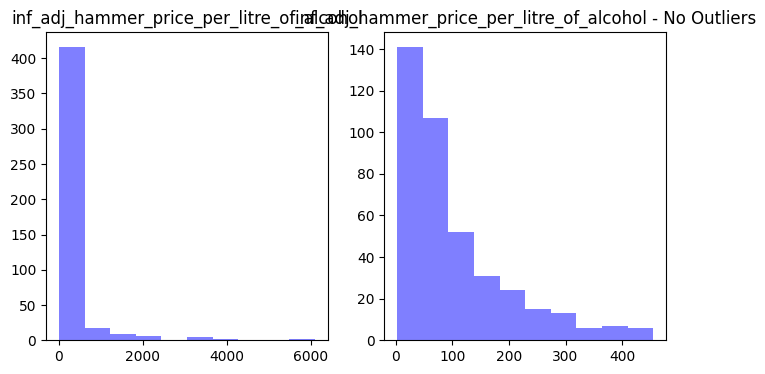

P-value - Shapiro-Wilk: 0.0000


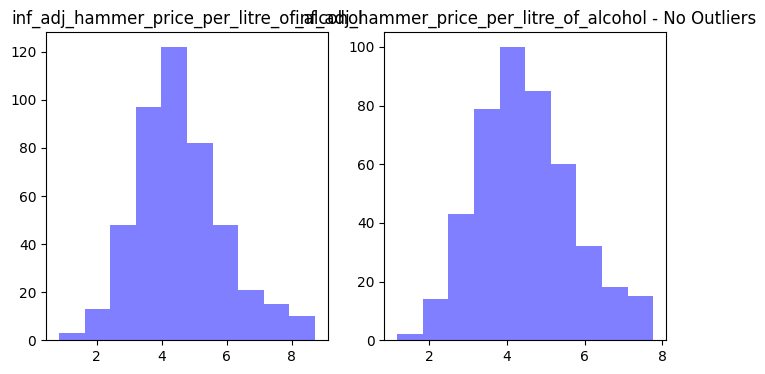

P-value - Shapiro-Wilk: 0.0001


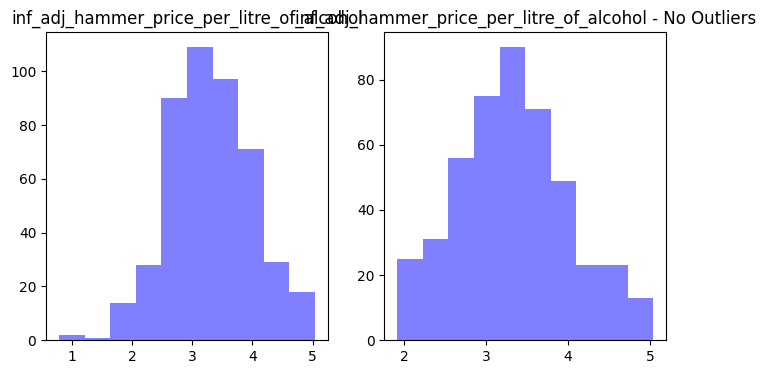

P-value - Shapiro-Wilk: 0.0060


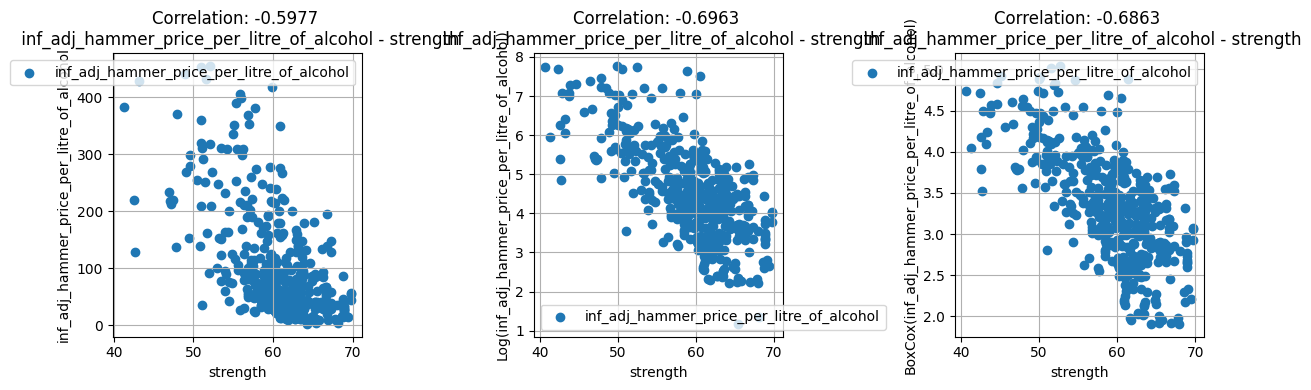

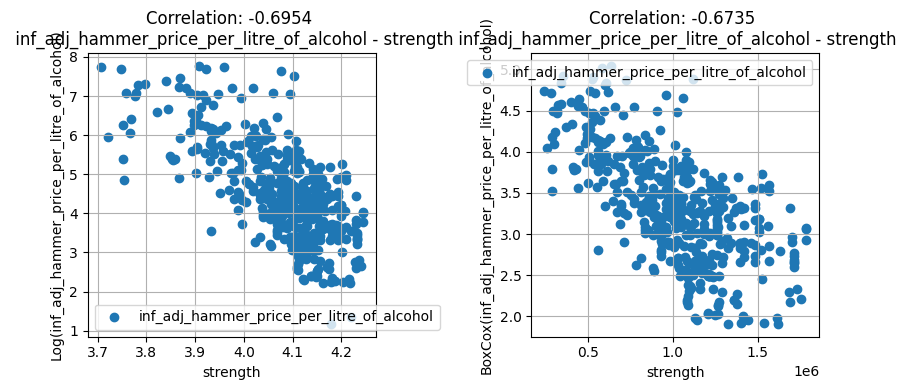

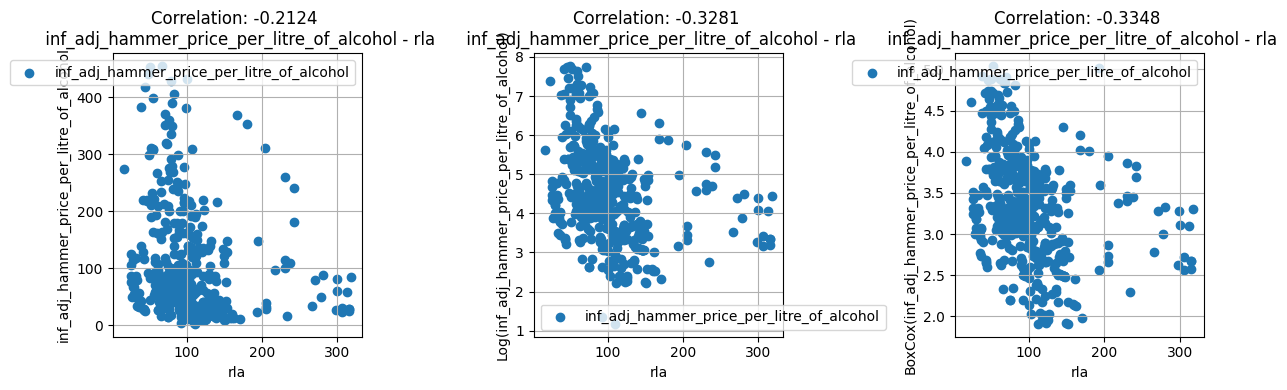

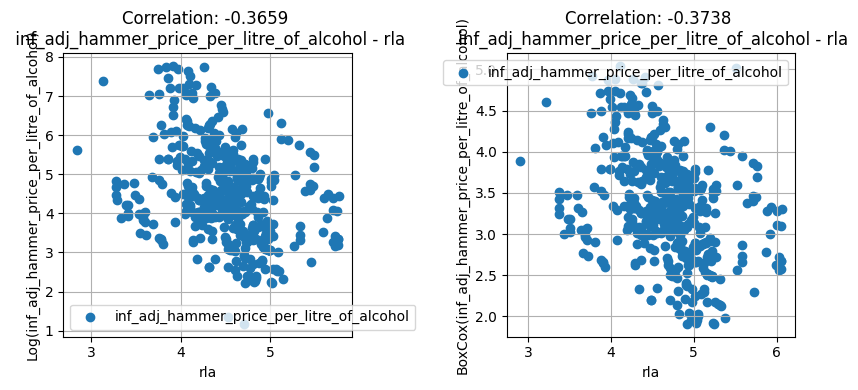

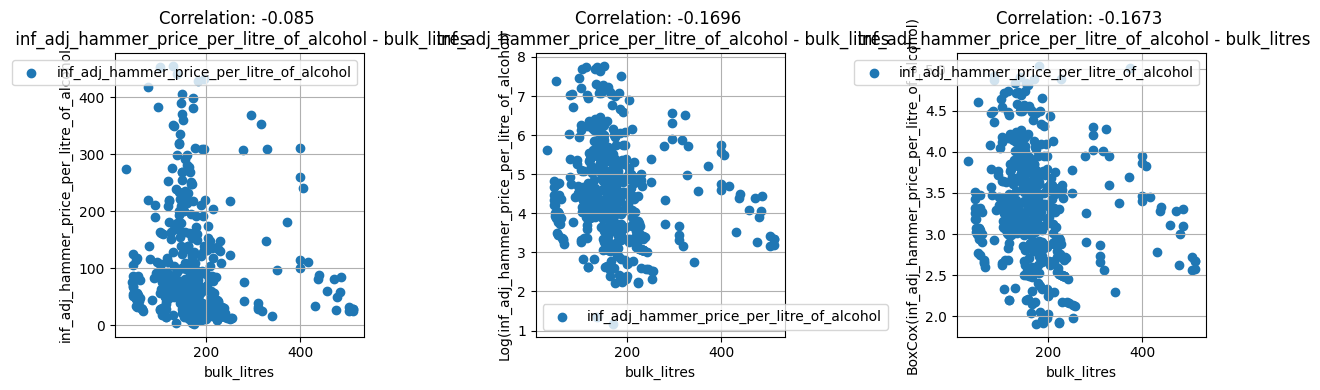

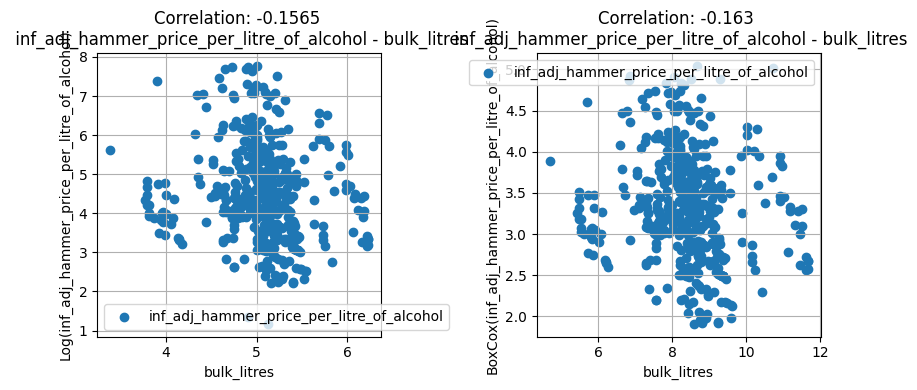

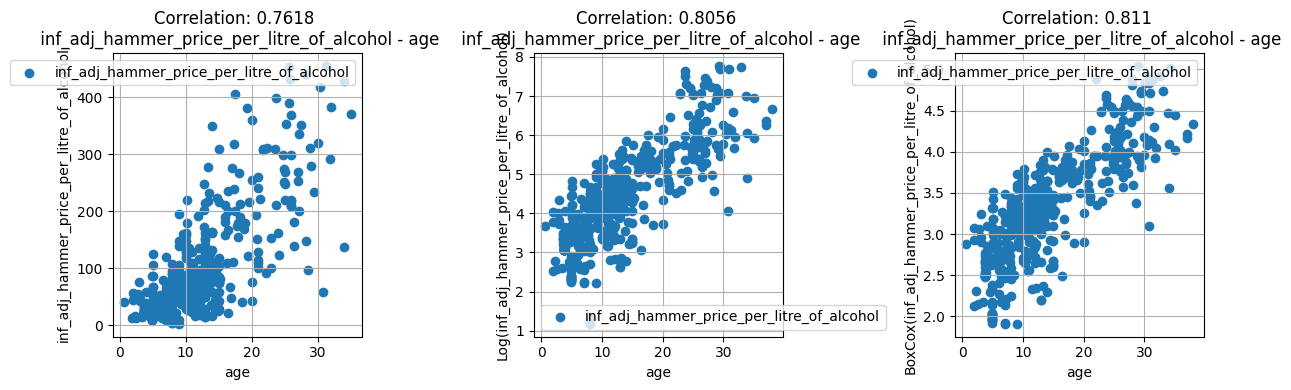

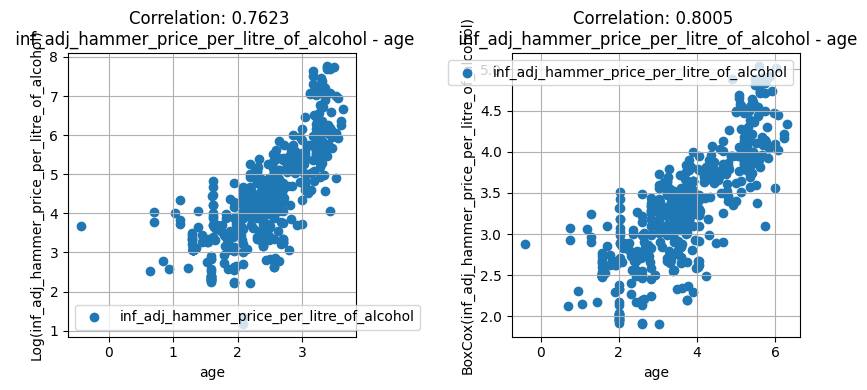

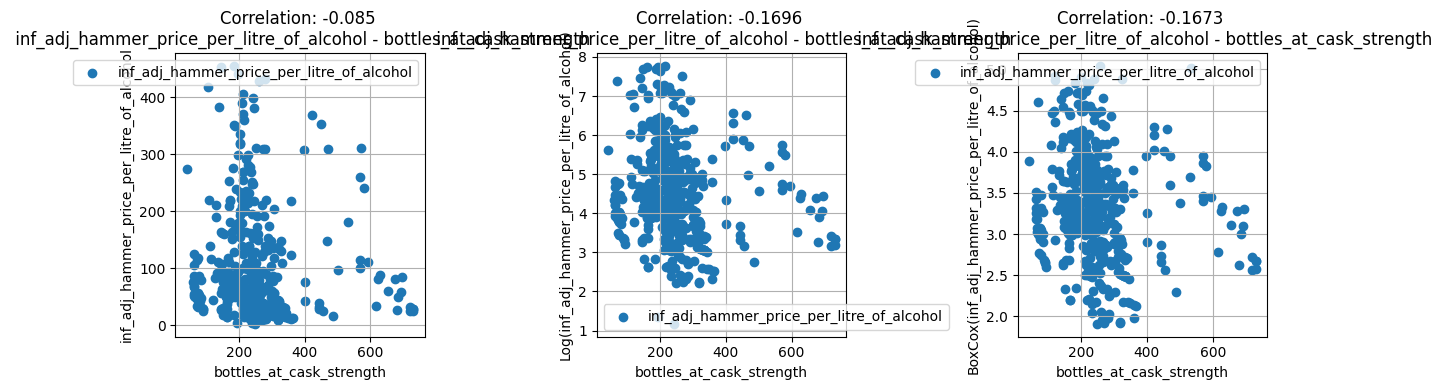

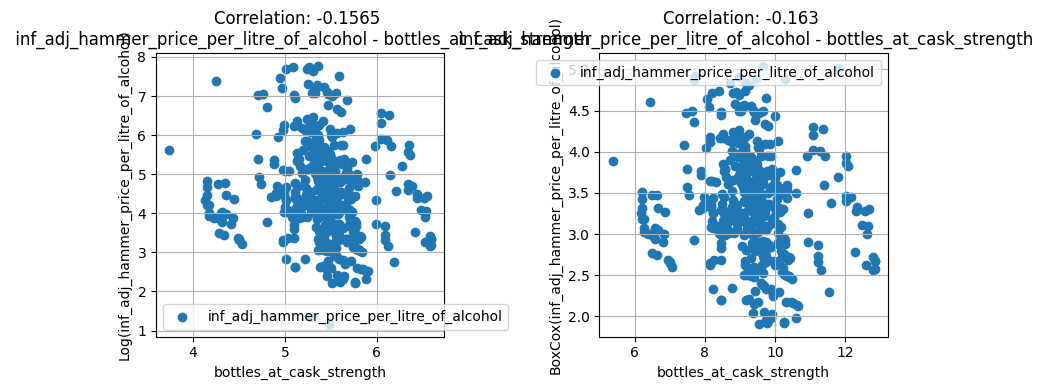

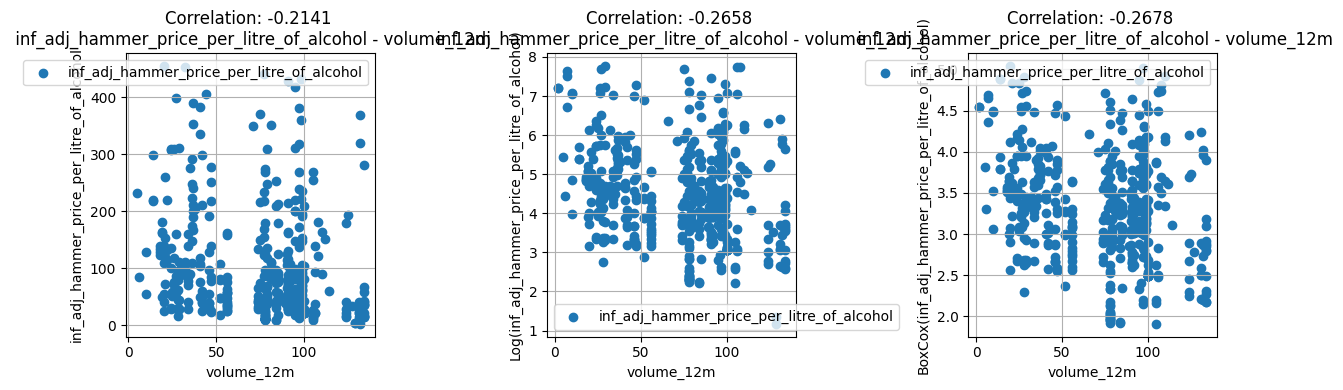

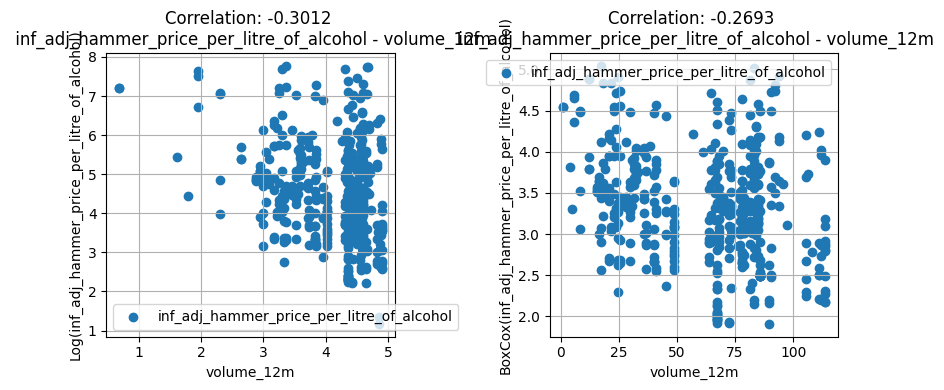

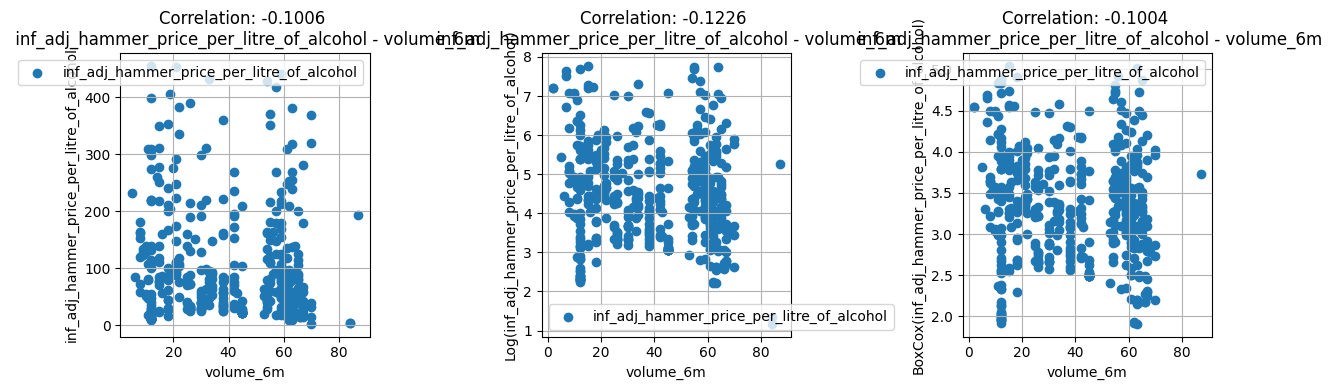

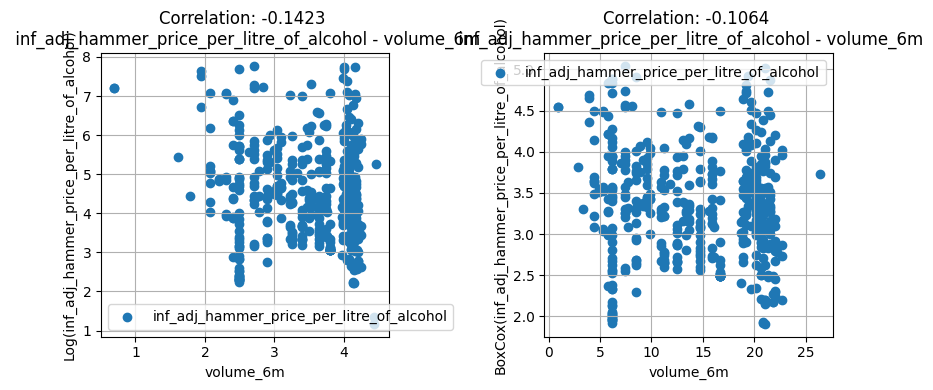

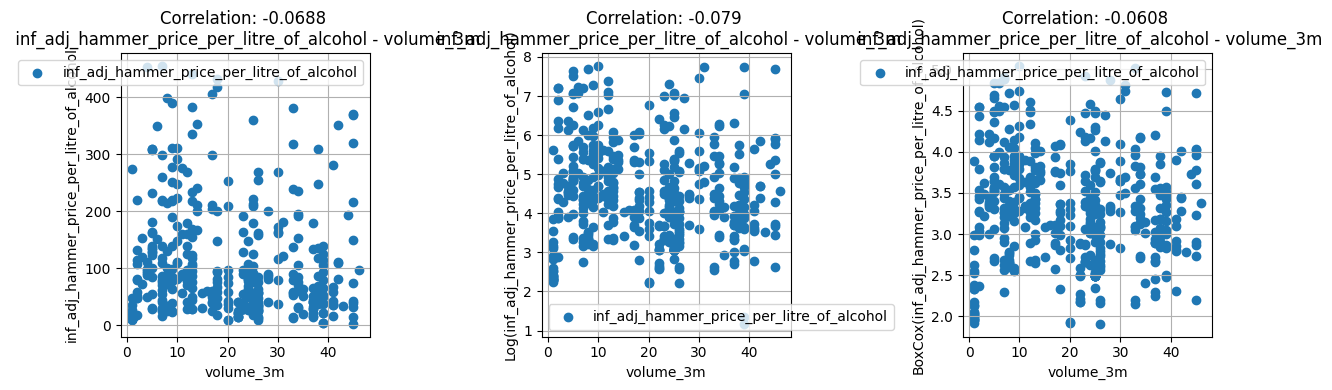

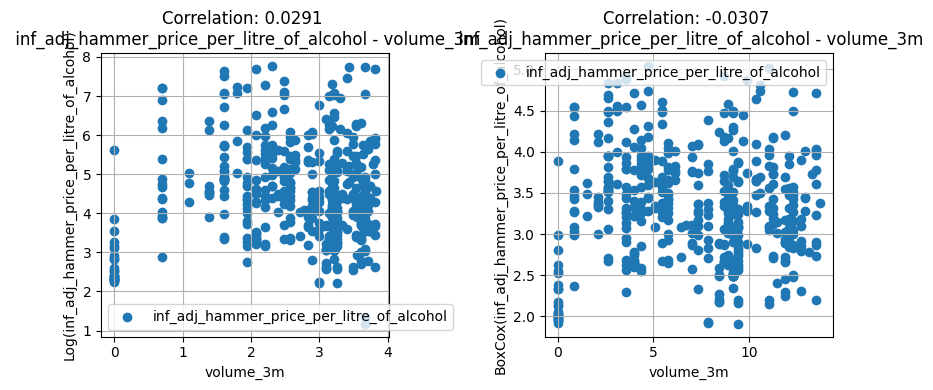



inf_adj_hammer_price_per_age


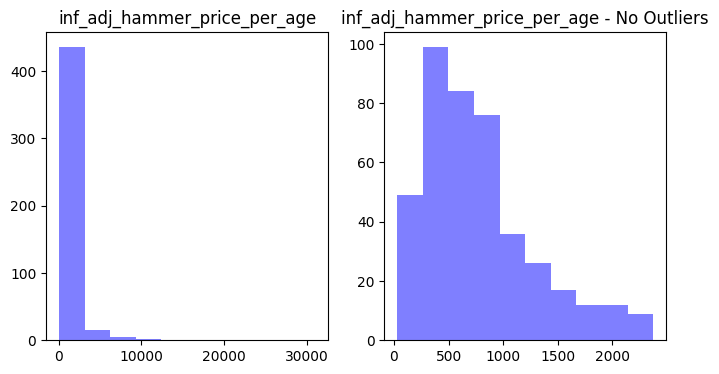

P-value - Shapiro-Wilk: 0.0000


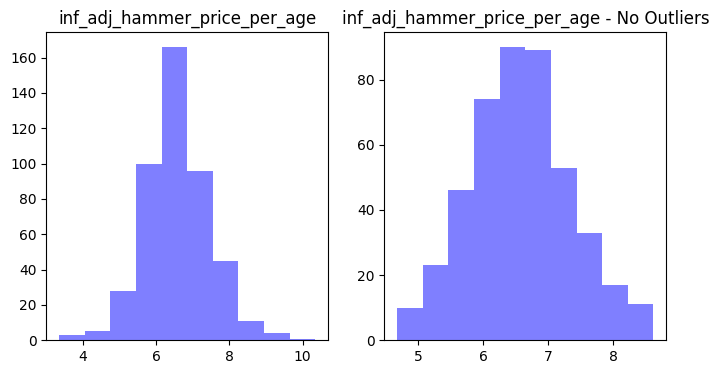

P-value - Shapiro-Wilk: 0.1411


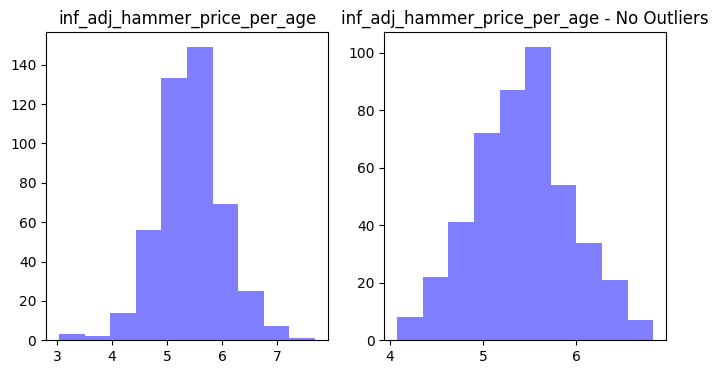

P-value - Shapiro-Wilk: 0.4791


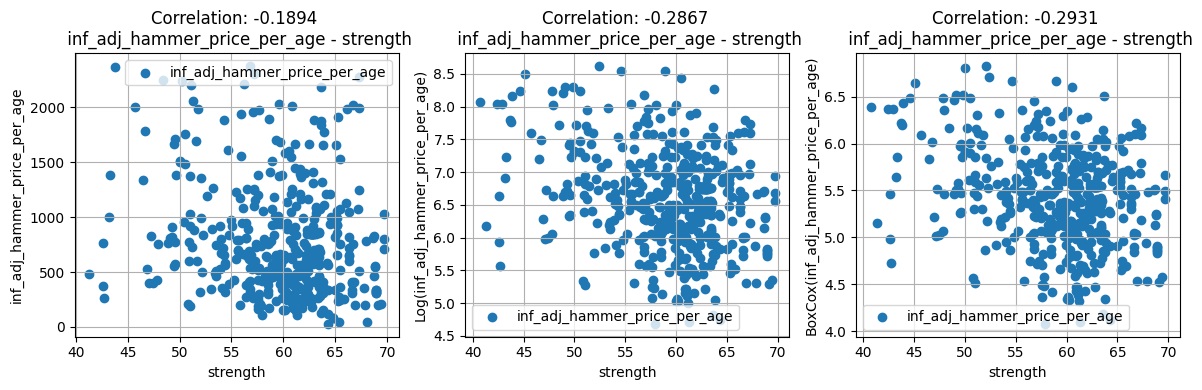

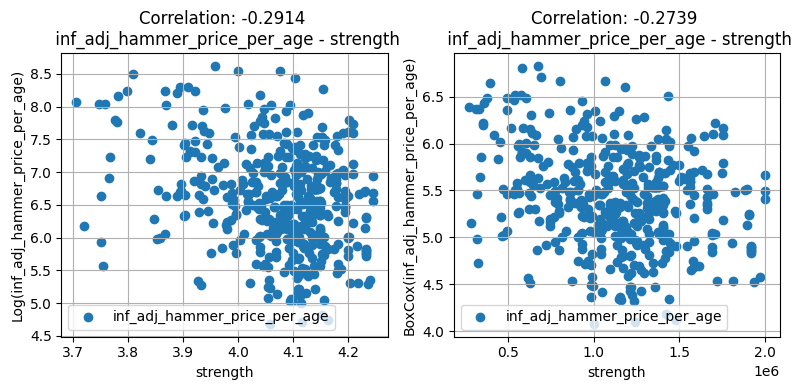

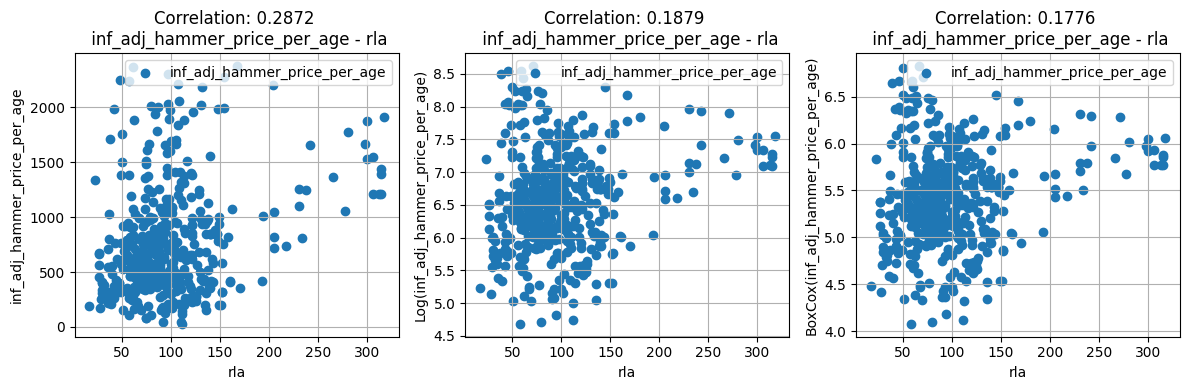

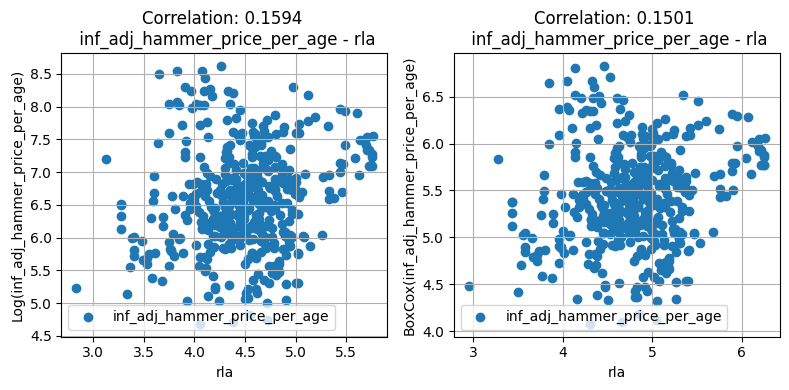

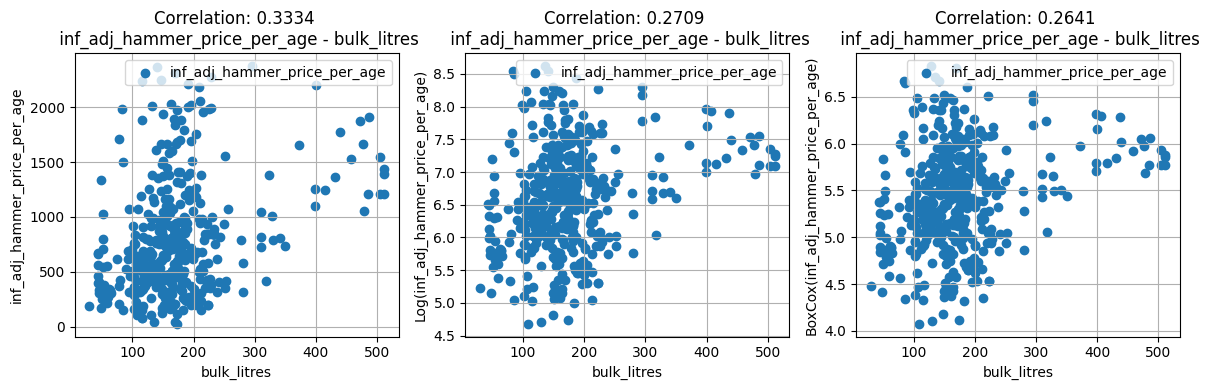

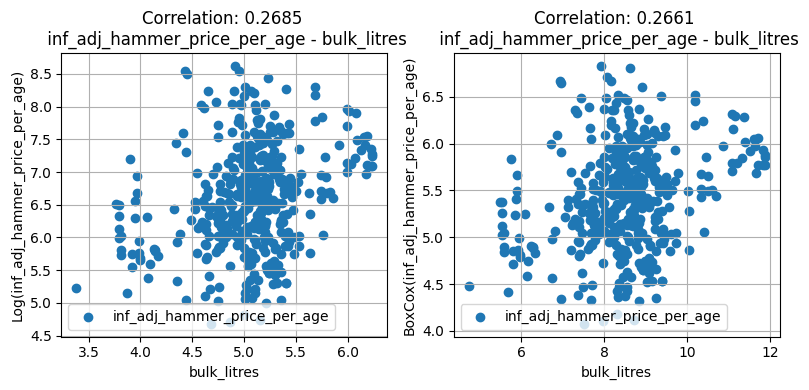

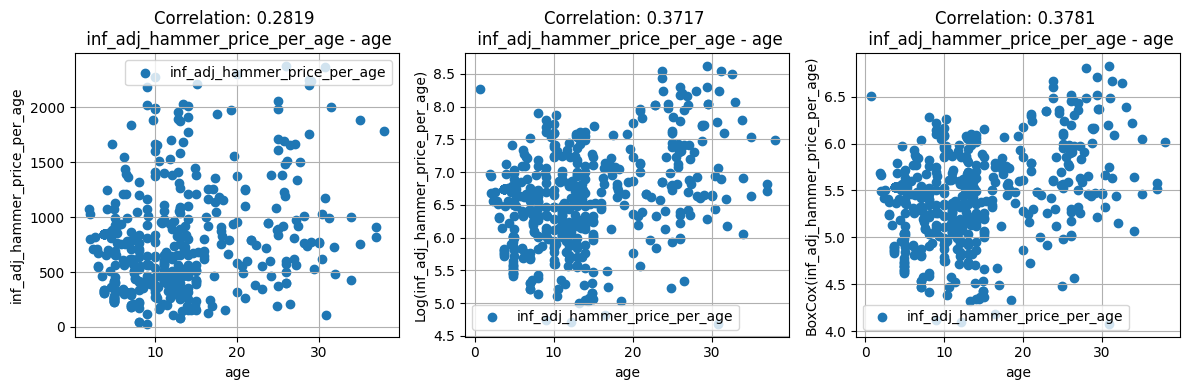

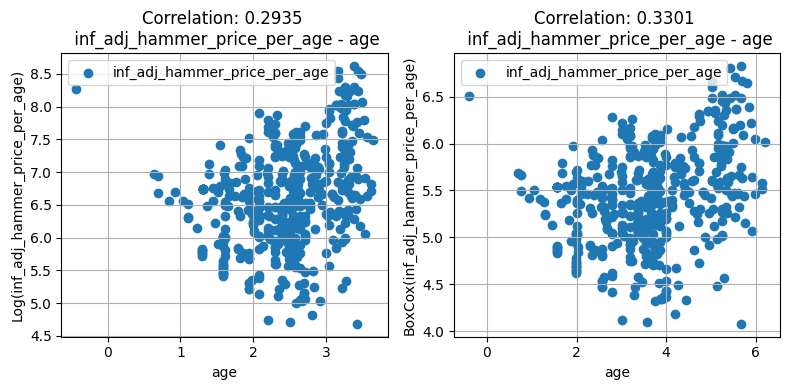

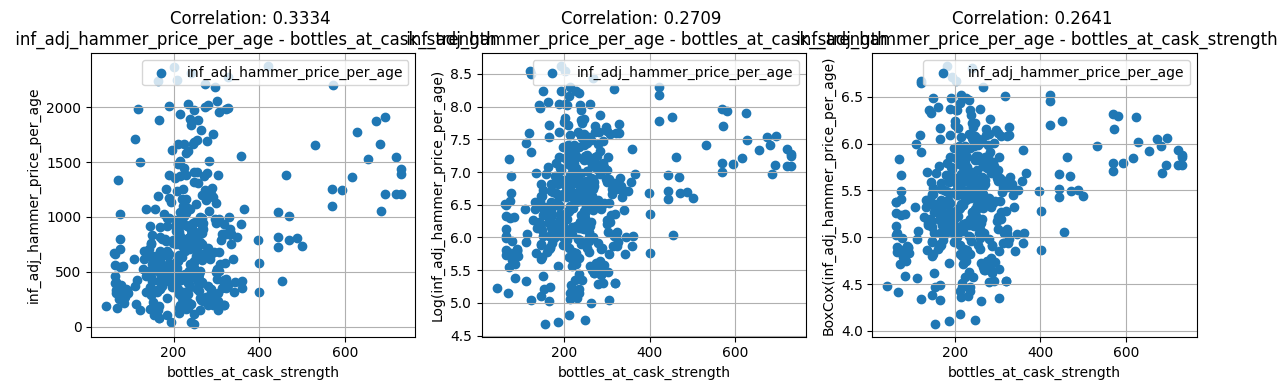

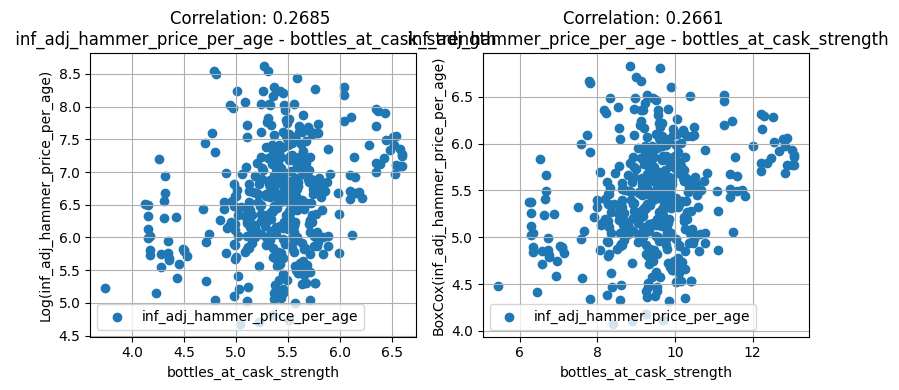

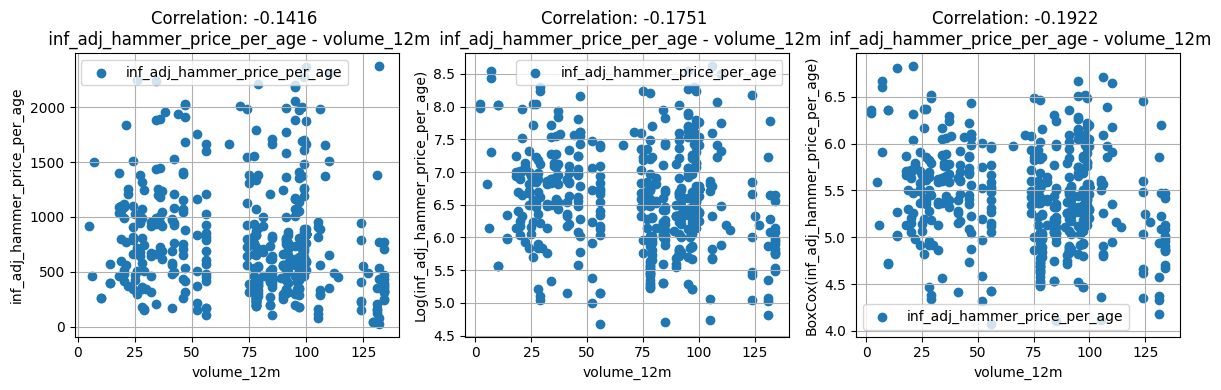

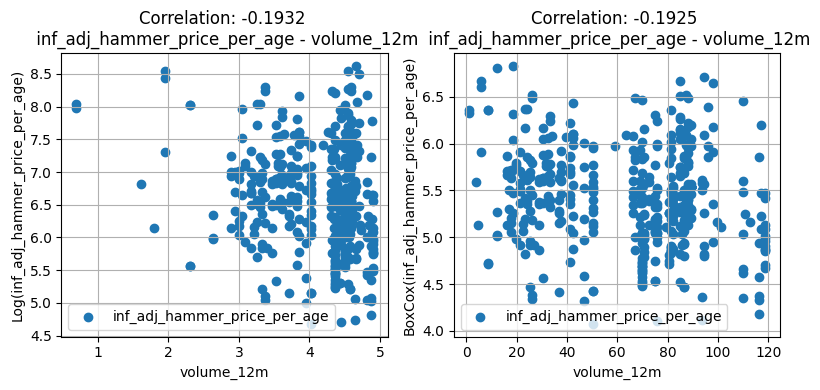

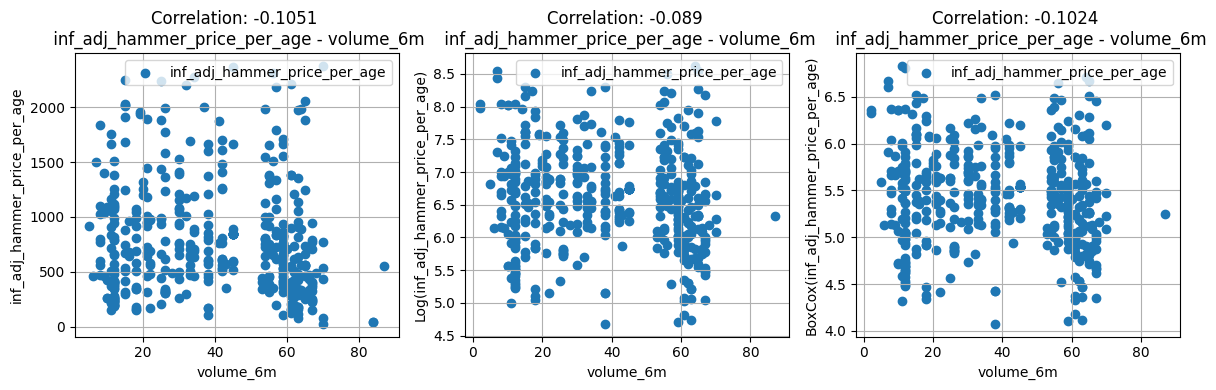

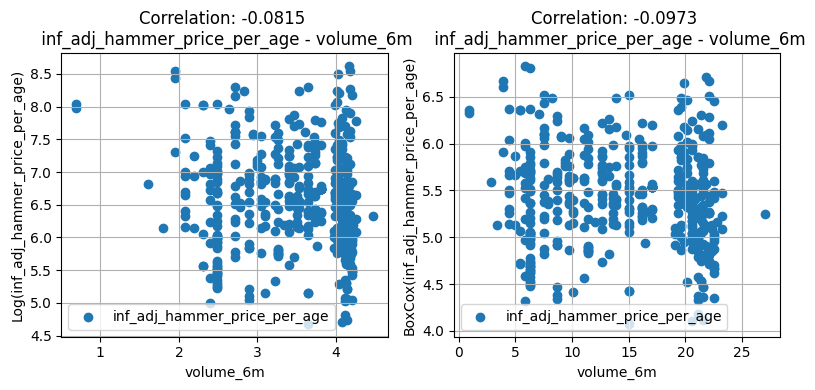

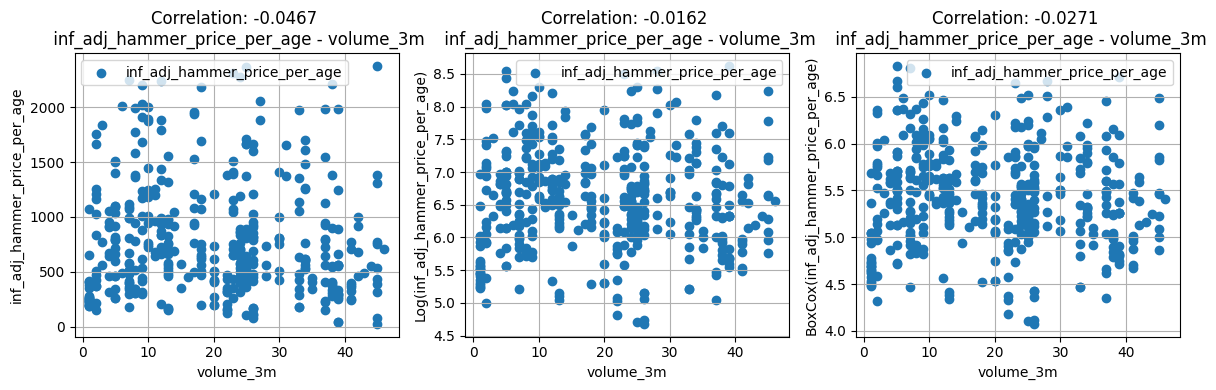

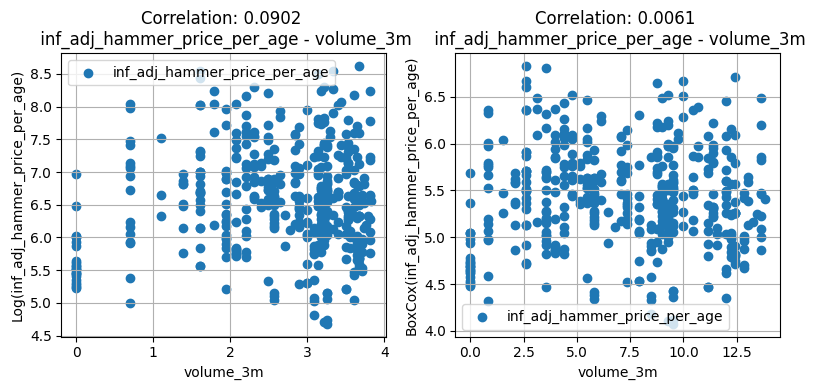



inf_adj_hammer_price_per_litre_of_alcohol_per_age


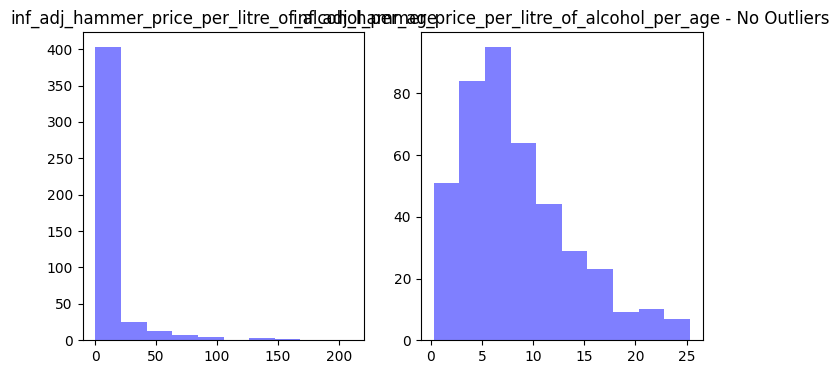

P-value - Shapiro-Wilk: 0.0000


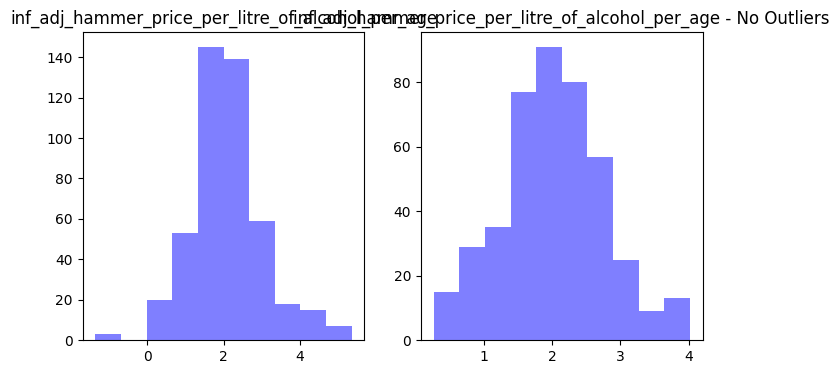

P-value - Shapiro-Wilk: 0.0187


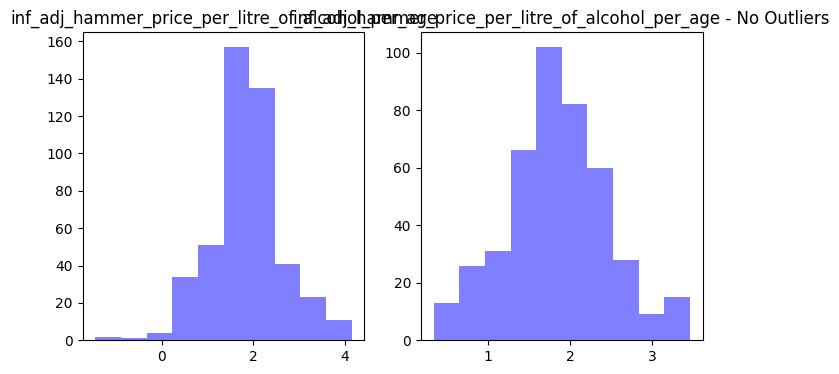

P-value - Shapiro-Wilk: 0.0100


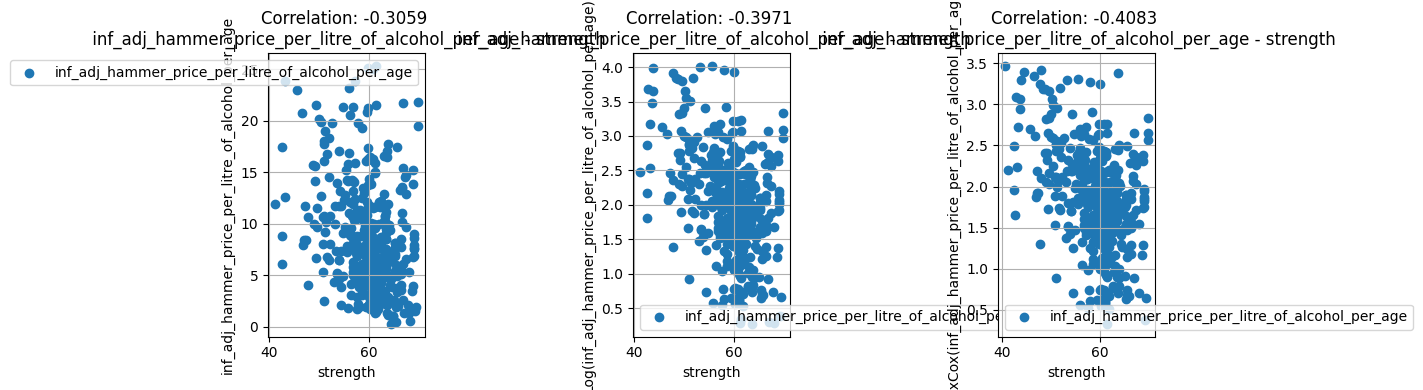

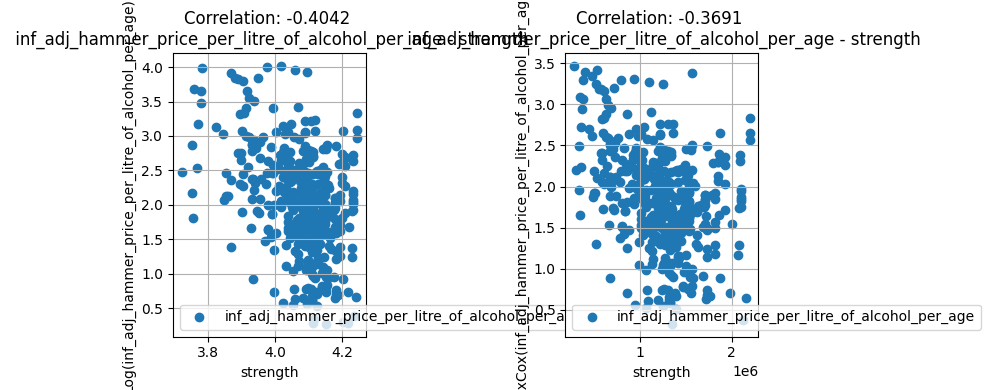

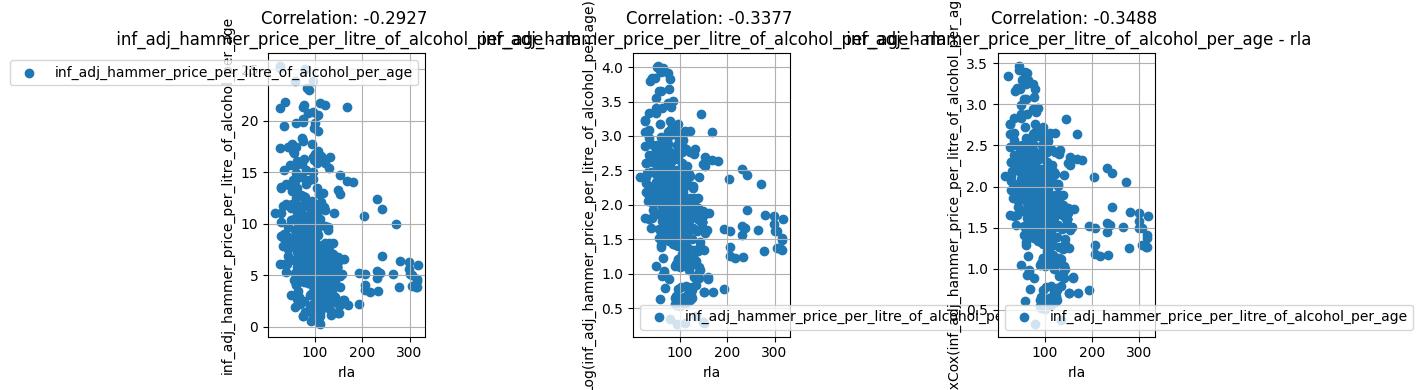

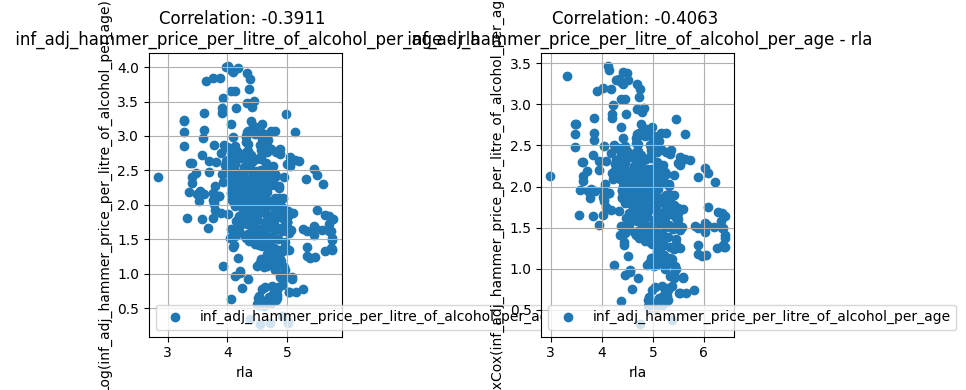

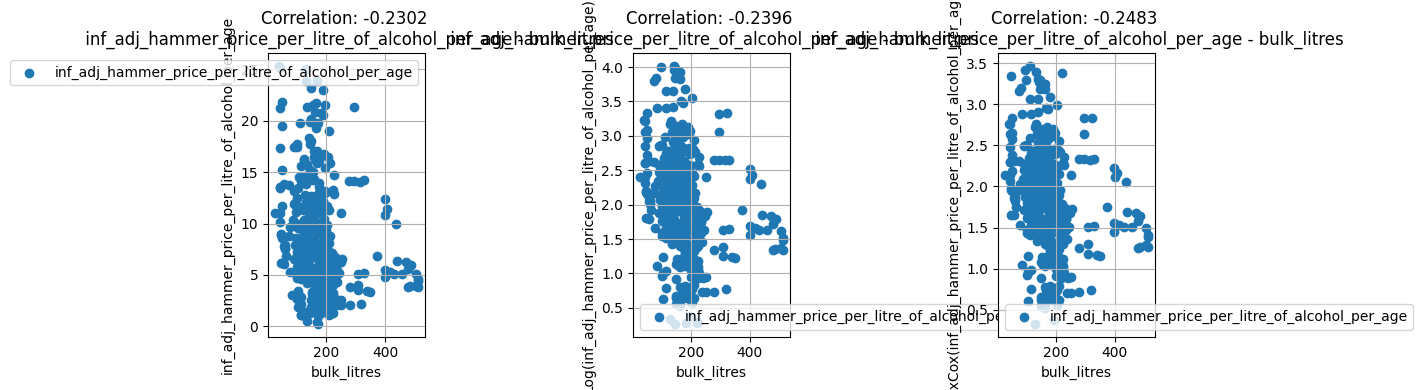

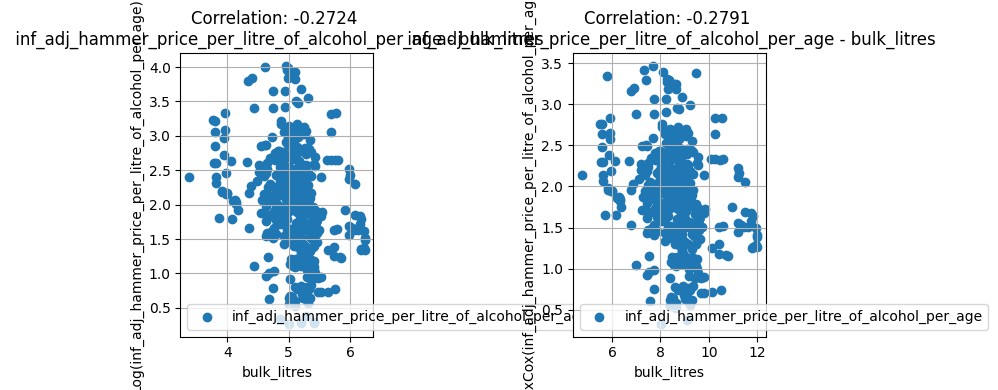

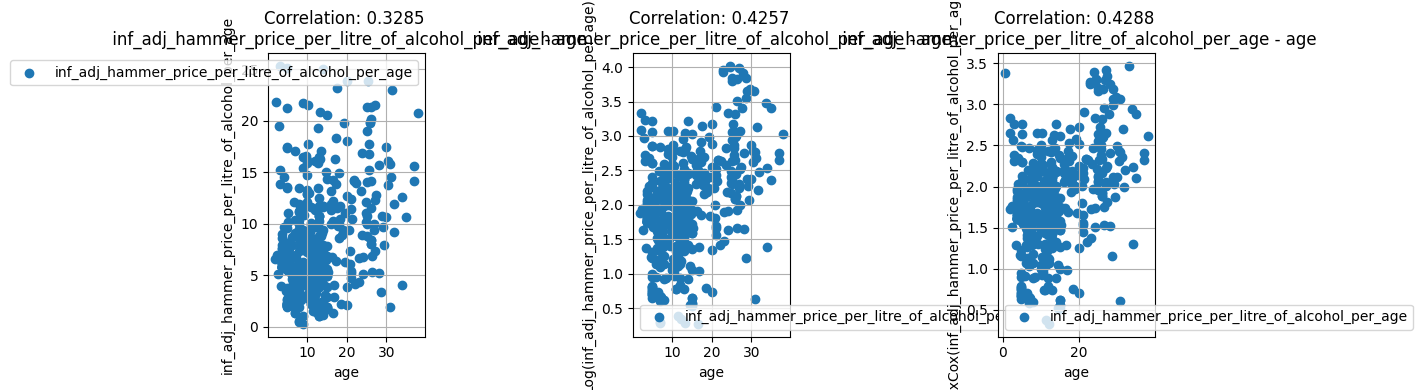

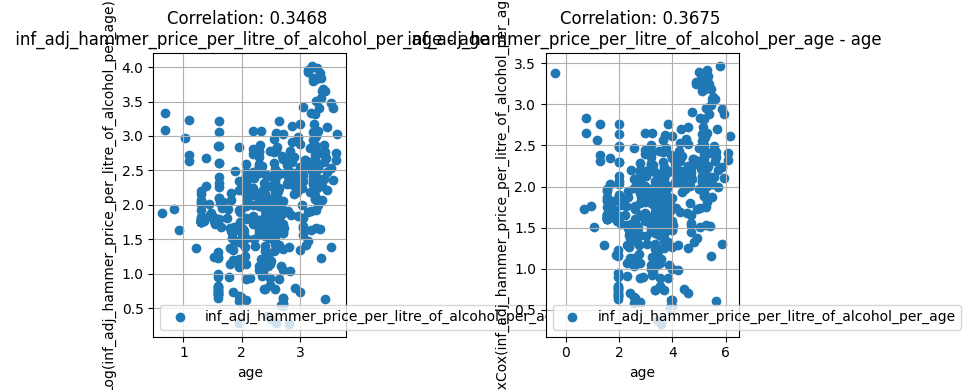

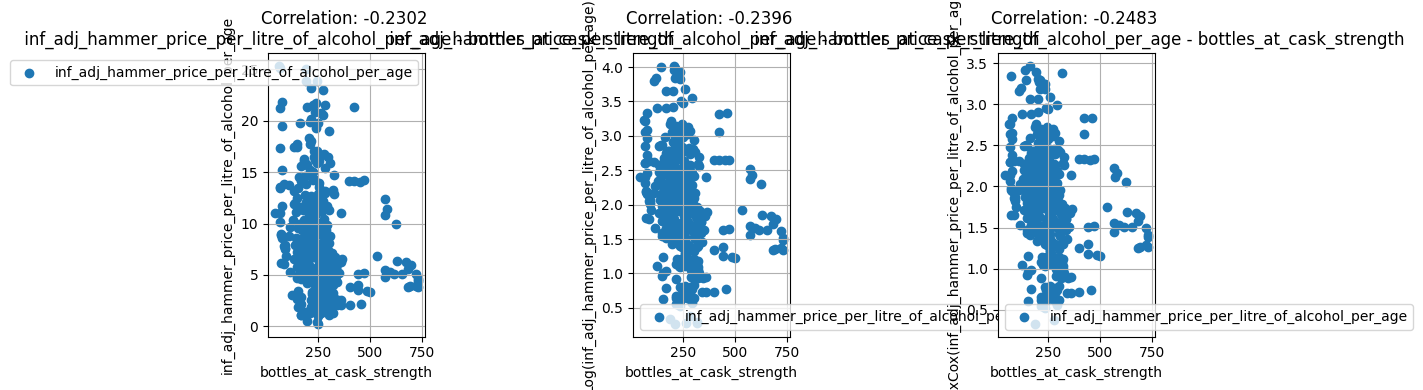

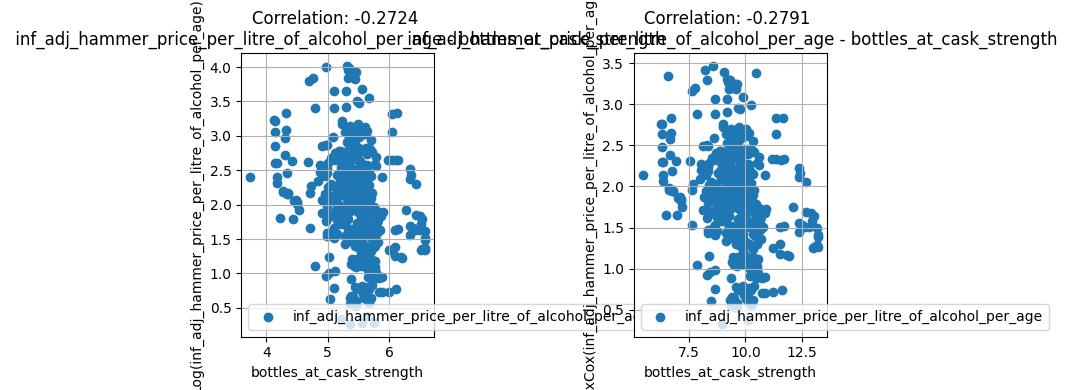

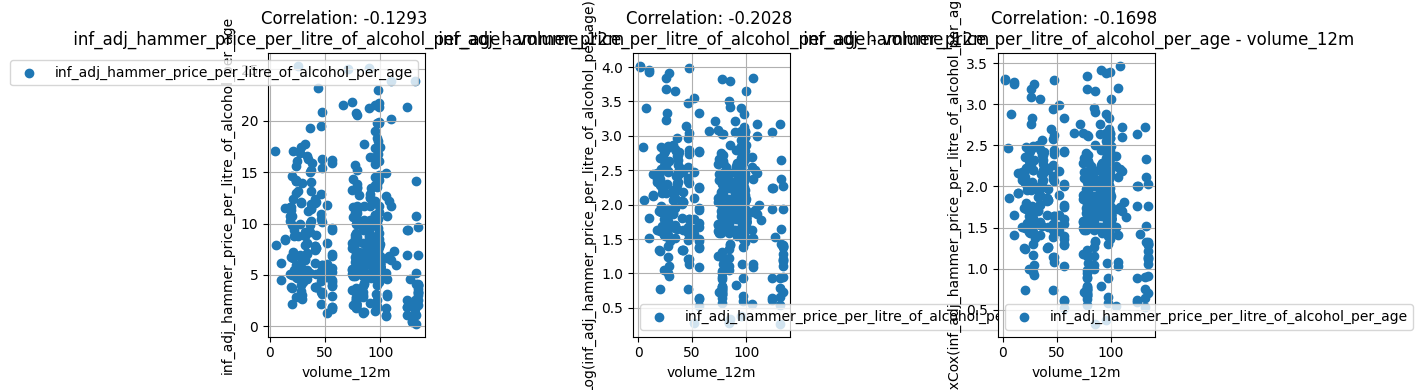

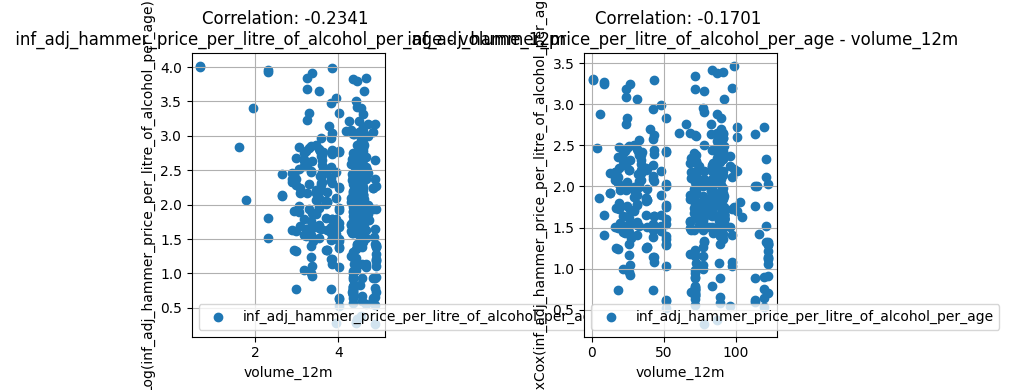

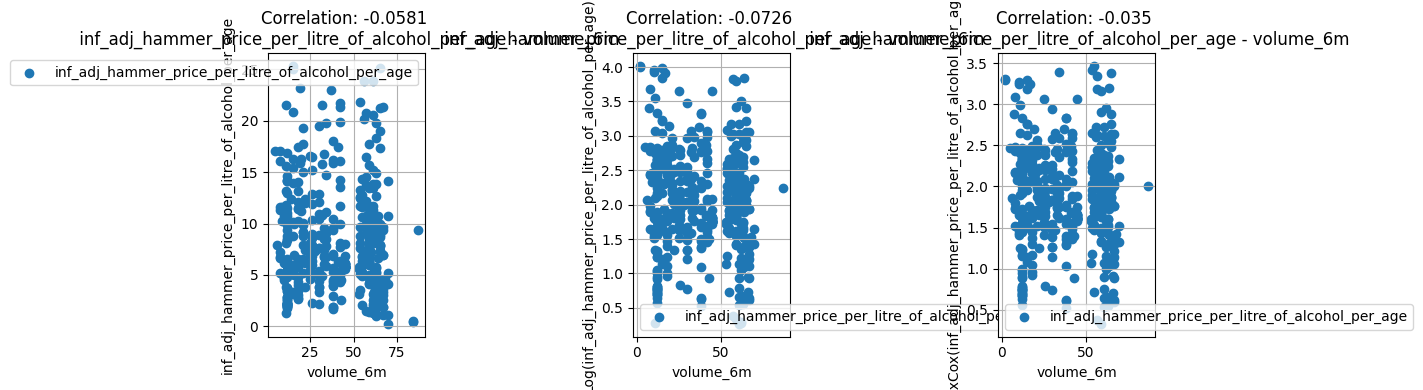

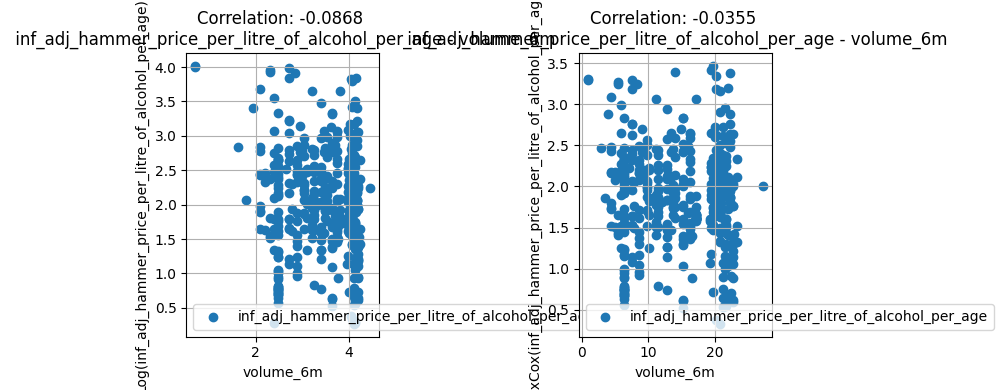

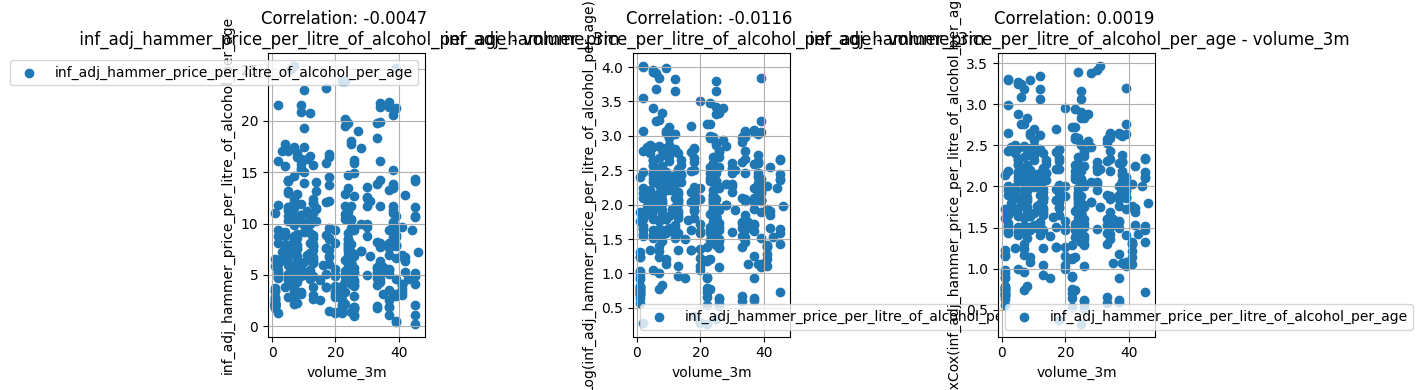

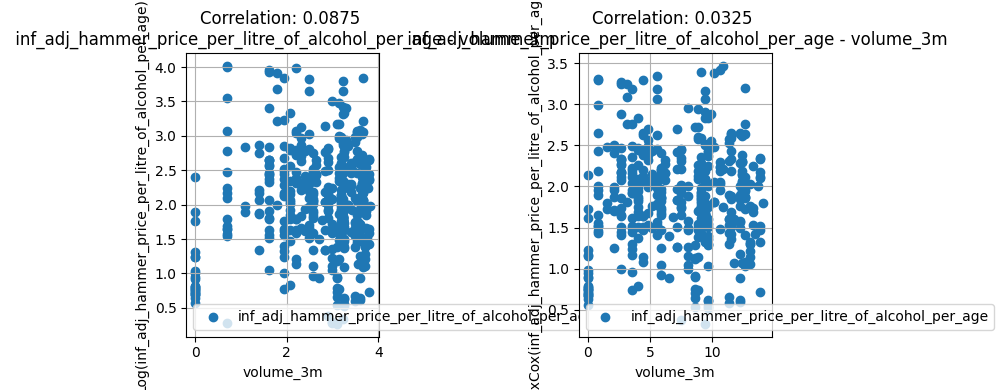

In [98]:
for y_col in['inf_adj_hammer_price', 'inf_adj_hammer_price_per_litre_of_alcohol', 'inf_adj_hammer_price_per_age', 'inf_adj_hammer_price_per_litre_of_alcohol_per_age']:
    
    print(y_col)

    # Log Transformation
    y_log = np.log(df[y_col])
    df_log = df.copy()
    df_log[y_col] = y_log

    # Box-Cox Transformation
    y_boxcox, fitted_lambda = boxcox(df[y_col])
    df_boxcox = df.copy()
    df_boxcox[y_col] = y_boxcox

    df_no_outliers = remove_outliers(df, y_col)
    stat, p_value = shapiro(df_no_outliers[y_col])
    print(f"P-value - Shapiro-Wilk: {p_value:.4f}")

    df_log_no_outliers = remove_outliers(df_log, y_col)
    stat, p_value = shapiro(df_log_no_outliers[y_col])
    print(f"P-value - Shapiro-Wilk: {p_value:.4f}")

    df_boxcox_no_outliers = remove_outliers(df_boxcox, y_col)
    stat, p_value = shapiro(df_boxcox_no_outliers[y_col])
    print(f"P-value - Shapiro-Wilk: {p_value:.4f}")

    for x_col in numerical_columns:

        fig, axs = plt.subplots(1, 3, figsize=(12, 4))

        corr_x_y = round(df_no_outliers[y_col].corr(df_no_outliers[x_col], method='pearson'), 4)

        axs[0].scatter(df_no_outliers[x_col], df_no_outliers[y_col], label=y_col, marker='o')
        axs[0].set_title(f'Correlation: {corr_x_y} \n {y_col} - {x_col}')
        axs[0].set_xlabel(x_col)
        axs[0].set_ylabel(y_col)
        axs[0].grid()
        axs[0].legend()

        corr_x_y = round(df_log_no_outliers[y_col].corr(df_log_no_outliers[x_col], method='pearson'), 4)

        axs[1].scatter(df_log_no_outliers[x_col], df_log_no_outliers[y_col], label=y_col, marker='o')
        axs[1].set_title(f'Correlation: {corr_x_y} \n {y_col} - {x_col}')
        axs[1].set_xlabel(x_col)
        axs[1].set_ylabel(f'Log({y_col})')
        axs[1].grid()
        axs[1].legend()

        corr_x_y = round(df_boxcox_no_outliers[y_col].corr(df_boxcox_no_outliers[x_col], method='pearson'), 4)

        axs[2].scatter(df_boxcox_no_outliers[x_col], df_boxcox_no_outliers[y_col], label=y_col, marker='o')
        axs[2].set_title(f'Correlation: {corr_x_y} \n {y_col} - {x_col}')
        axs[2].set_xlabel(x_col)
        axs[2].set_ylabel(f'BoxCox({y_col})')
        axs[2].grid()
        axs[2].legend()

        plt.tight_layout()
        plt.show()

        fig, axs = plt.subplots(1, 2, figsize=(8, 4))

        x_col_log = np.log(df_log_no_outliers[x_col])

        corr_x_y = round(df_log_no_outliers[y_col].corr(x_col_log, method='pearson'), 4)

        axs[0].scatter(x_col_log, df_log_no_outliers[y_col], label=y_col, marker='o')
        axs[0].set_title(f'Correlation: {corr_x_y} \n {y_col} - {x_col}')
        axs[0].set_xlabel(x_col)
        axs[0].set_ylabel(f'Log({y_col})')
        axs[0].grid()
        axs[0].legend()

        x_col_boxcox = pd.Series(boxcox(df_boxcox_no_outliers[x_col])[0], index=df_boxcox_no_outliers.index)

        corr_x_y = round(df_boxcox_no_outliers[y_col].corr(x_col_boxcox, method='pearson'), 4)

        axs[1].scatter(x_col_boxcox, df_boxcox_no_outliers[y_col], label=y_col, marker='o')
        axs[1].set_title(f'Correlation: {corr_x_y} \n {y_col} - {x_col}')
        axs[1].set_xlabel(x_col)
        axs[1].set_ylabel(f'BoxCox({y_col})')
        axs[1].grid()
        axs[1].legend()

        plt.tight_layout()
        plt.show()

    print('\n')

In [118]:
df = df.drop(columns=['rla', 'bulk_litres', 'bottles_at_cask_strength', 'volume_12m', 'volume_6m', 'volume_3m'])

In [120]:
df = df.drop(columns=['inf_adj_hammer_price_per_litre_of_alcohol_per_age', 'inf_adj_hammer_price_per_age'])

In [121]:
df

auction_date               distillery     region   country  strength  \
0     2025-01-06            Bruichladdich      Islay  Scotland     50.40   
1     2025-01-06             Copper House    England   England     64.80   
2     2025-01-06             Copper House    England   England     64.29   
3     2024-12-02             Copper House    England   England     64.29   
4     2024-12-02                Tobermory    Islands  Scotland     50.90   
..           ...                      ...        ...       ...       ...   
454   2024-09-08   Undisclosed Distillery   Lowlands  Scotland     62.30   
455   2024-09-08   Undisclosed Distillery   Lowlands  Scotland     62.60   
456   2024-09-08   Undisclosed Distillery   Lowlands  Scotland     63.10   
457   2024-09-08   Undisclosed Distillery   Lowlands  Scotland     62.60   
458   2024-10-27  Whitlaw (Highland Park)  Highlands  Scotland     64.50   

       cask_type previous_spirit    age  inf_adj_hammer_price  \
0         Barrel         Bourbon  20.00              19060.19   
1         Barrel         Bourbon  13.00               1030.28   
2    Undisclosed     Undisclosed   9.00               1030.28   
3    Undisclosed     Undisclosed   9.00                257.19   
4       Hogshead     Undisclosed  30.00              23147.12   
..           ...             ...    ...                   ...   
454     Hogshead          Sherry   3.69               3118.48   
455     Hogshead          Sherry   3.69               3118.48   
456     Hogshead          Sherry   3.69               3118.48   
457     Hogshead          Sherry   3.69               3118.48   
458     Hogshead     Undisclosed   5.82               5476.67   

     inf_adj_hammer_price_per_litre_of_alcohol  
0                                       254.48  
1                                        13.78  
2                                         9.23  
3                                         2.30  
4                                       320.60  
..                                         ...  
454                                      22.91  
455                                      22.13  
456                                      21.14  
457                                      22.31  
458                                      40.43  

[459 rows x 10 columns]

In [ ]:
df['previous_spirit'] = df['previous_spirit'].where(df['previous_spirit'].isin(['Port', 'Rum', 'Madeira', 'Virgin Oak']), 'Other')

df['cask_filling'] = df['cask_filling'].where(df['cask_filling'].isin(['Virgin Oak', 'Third Fill']), 'Other')

df['country'] = df['country'].where(df['country'].isin(['Ireland', 'USA', 'Hogshead', 'Undisclosed']), 'Other')

df['region'] = df['region'].where(df['region'].isin(['Ireland', 'USA', 'Hogshead', 'Undisclosed', 'Kentucky, USA']), 'Other')

In [ ]:
distillery_count = df['distillery'].value_counts()
distillery_count = distillery_count[distillery_count < 10]
distillery_count

distillery
Port Dundas                   9
Fettercairn                   9
Aultmore                      8
Jura                          8
Speyside                      7
                             ..
Littlemill                    1
Hazelburn                     1
Highland Park                 1
Lochindaal (Bruichladdich)    1
Whitlaw (Highland Park)       1
Name: count, Length: 69, dtype: int64